# Start


Importing the necessary libraries


In [ ]:
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.power import TTestIndPower

Loading dataset


In [ ]:
file_path: str = "../data/raw"
files: tuple[str, ...] = ("connections", "devices", "processes", "profiles")

dataset: dict[str, pd.DataFrame] = {}
for file in files:
    dataset[file] = pd.read_csv(f"{file_path}/{file}.csv", sep="\t")

# 1.1 - Bacis description of data along with their characteristics


## A.)


#### Connections description


In [ ]:
dataset["connections"].sample(5, random_state=42)

,ts,imei,mwra,c.dogalize,c.android.gm,c.android.youtube,c.android.chrome,c.katana,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
2478,2018-05-07 03:18:00,863033069630348529,0.0,6.54926,7.81799,12.06074,8.95700,13.20352,29.06246,21.64053,57.33515,47.11987,50.14656
11981,2018-05-13 17:41:00,359043379931766866,1.0,5.83892,5.27613,13.05997,12.09960,8.25104,51.37741,69.21076,84.34757,29.04819,15.15880
1921,2018-05-06 18:01:00,359043379931766817,0.0,10.53705,10.15789,12.41968,7.98650,10.94604,51.74215,93.94294,70.66945,2.37771,82.12835
9921,2018-05-12 07:21:00,8630330696303482444,0.0,10.32342,13.69773,9.82591,14.12814,9.83534,49.08630,10.37858,61.28713,9.65860,76.09933
8761,2018-05-11 12:01:00,8630330696303481263,0.0,8.63406,11.06840,13.82316,7.22746,17.65516,52.89041,69.17993,94.24610,2.58110,30.55197


In [ ]:
dataset["connections"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15108 non-null  object 
 1   imei               15108 non-null  int64  
 2   mwra               15108 non-null  float64
 3   c.dogalize         15108 non-null  float64
 4   c.android.gm       15108 non-null  float64
 5   c.android.youtube  15108 non-null  float64
 6   c.android.chrome   15108 non-null  float64
 7   c.katana           15108 non-null  float64
 8   c.raider           15108 non-null  float64
 9   c.android.vending  15108 non-null  float64
 10  c.UCMobile.x86     15108 non-null  float64
 11  c.updateassist     15108 non-null  float64
 12  c.UCMobile.intl    15108 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


-   Total Entries: 15,108
-   Total Columns: 13
-   Column Types:
-   11 columns of type float64
-   1 column of type int64
-   1 column of type object
-   There are no missing values in this data
-   Column "imei" is id of device


In [ ]:
dataset["connections"]["ts"]

0        2018-05-05 10:00:00
1        2018-05-05 10:01:00
2        2018-05-05 10:02:00
3        2018-05-05 10:03:00
4        2018-05-05 10:04:00
                ...         
15103    2018-05-05 20:51:00
15104    2018-05-12 15:15:00
15105    2018-05-08 09:46:00
15106    2018-05-08 20:46:00
15107    2018-05-14 20:56:00
Name: ts, Length: 15108, dtype: object

-   The object column "ts" is date and time


Convert object column "ts" to datetime


In [ ]:
dataset["connections"]["ts"] = pd.to_datetime(dataset["connections"]["ts"])

In [ ]:
connection_summary = dataset["connections"].iloc[:, 2:].describe()
median = (
    dataset["connections"].select_dtypes(include=["float64", "int64"]).median()
)  ## adding median to describe method output
connection_summary.loc["median"] = median

connection_summary

,mwra,c.dogalize,c.android.gm,c.android.youtube,c.android.chrome,c.katana,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,0.625563,10.309496,10.928002,12.141882,10.933567,10.416465,48.846209,49.482347,49.685602,49.822994,49.805628
std,0.483993,2.626325,2.696930,2.225872,2.652465,2.626934,13.031848,28.905578,28.962924,29.030406,28.843199
min,0.000000,0.642300,2.587630,2.348110,2.655890,1.165660,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.434330,8.943805,10.934585,8.965822,8.538965,39.977420,24.570853,24.731063,24.532995,24.735187
50%,1.000000,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235
75%,1.000000,12.049473,12.850918,13.642702,12.806403,12.192747,57.737270,74.651803,74.873525,75.301215,74.849797
max,1.000000,20.212930,22.004980,19.587410,21.092210,19.919510,100.000000,100.000000,100.000000,100.000000,100.000000
median,1.000000,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235


-   The values in columns starting with c. (such as c.android.youtube) are probably not a **% cpu time** or something similar, because the sum of all values in a row is not equal to 100.
-   We can assume it is just a value or a weight of the connection type, indicating what influenced **mwra** most


First few rows in columns "ts" might indicate that the data was sample in a 1 minute interval. Let's look at it closer.


In [ ]:
times = dataset["connections"].sort_values(by="ts")["ts"]
times

0       2018-05-05 10:00:00
1       2018-05-05 10:01:00
2       2018-05-05 10:02:00
3       2018-05-05 10:03:00
4       2018-05-05 10:04:00
                ...        
14924   2018-05-15 18:44:00
14925   2018-05-15 18:45:00
14926   2018-05-15 18:46:00
14927   2018-05-15 18:47:00
14928   2018-05-15 18:48:00
Name: ts, Length: 15108, dtype: datetime64[ns]

-   Now we see it looks like samples are in a 1 minute interval.


In [ ]:
previous_time: Optional[pd.Series] = None

same_times: int = 0
non_minute_differences: int = 0


for current_time in times:
    if previous_time is None:
        previous_time = current_time
        continue

    if (current_time - previous_time).seconds == 0:
        same_times += 1

    elif (current_time - previous_time).seconds != 60:
        non_minute_differences += 1

    previous_time = current_time

print(f"Non minute differences: {non_minute_differences}")
print(f"Same times: {same_times}")
print(f"Number of duplicates: {dataset['connections'].duplicated().sum()}")

Non minute differences: 0
Same times: 179
Number of duplicates: 179


-   There is exactly one minute between each sample. (There are is no more or less than a minute between samples)
-   The same times are duplicates, not 2 data from 2 devices at the same time.


In [ ]:
dataset["connections"]["mwra"].value_counts()

mwra
1.0    9451
0.0    5657
Name: count, dtype: int64

-   mwra is (Malware-related-activity)
-   1 is True, 0 is False, specifying if there was a malware-related activity in the device at that time.


#### Devices description


In [ ]:
dataset["devices"].sample(5, random_state=42)

,latitude,longitude,store_name,code,location,imei
1472,49.88307,-119.48568,Kelowna,CA,America/Vancouver,3590433799317661123
2178,47.64995,-117.23991,Opportunity,US,America/Los_Angeles,863033069630348164
368,36.20829,-115.98391,Pahrump,US,America/Los_Angeles,8630330696303481990
2614,7.60000,4.18333,Olupona,NG,Africa/Lagos,863033069630348586
1818,41.16704,-73.20483,Bridgeport,US,America/New_York,863033069630348842


In [ ]:
dataset["devices"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2929 non-null   float64
 1   longitude   2929 non-null   float64
 2   store_name  2929 non-null   object 
 3   code        2929 non-null   object 
 4   location    2929 non-null   object 
 5   imei        2929 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 137.4+ KB


-   Total Entries: 2929
-   Total Columns: 6
-   Column Types:
-   2 columns of type float64
-   1 column of type int64
-   3 column of type object
-   There are no missing values in this data


In [ ]:
dataset["devices"][["store_name", "code", "location"]].sample(5, random_state=42)

,store_name,code,location
1472,Kelowna,CA,America/Vancouver
2178,Opportunity,US,America/Los_Angeles
368,Pahrump,US,America/Los_Angeles
2614,Olupona,NG,Africa/Lagos
1818,Bridgeport,US,America/New_York


-   The object columns are strings
-   "store_name" object is a string
-   "code" is string, holding code for state
-   "location" is a string, containing continent/state/city


In [ ]:
devices_summary = dataset["devices"].describe()
median = (
    dataset["devices"].select_dtypes(include=["float64", "int64"]).median()
)  ## adding median to describe method output
devices_summary.loc["median"] = median

## dropping imei, as it has no meaning to make these statistics out of it
devices_summary.drop(columns=["imei"], inplace=True)
devices_summary

,latitude,longitude
count,2929.000000,2929.000000
mean,29.279310,11.548748
std,22.929049,73.811177
min,-54.800000,-156.474320
25%,15.460630,-59.133160
50%,36.192780,9.476290
75%,46.083330,73.000000
max,68.798330,178.004170
median,36.192780,9.476290


-   This doesn't tell us anything


#### Processes description


In [ ]:
dataset["processes"].sample(5, random_state=42)

,ts,imei,mwra,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.android.chrome,p.android.gm,p.system,p.android.externalstorage,...,p.browser.provider,p.android.defcontainer,p.dogalize,p.olauncher,p.simulator,p.inputmethod.latin,p.android.gms,p.notifier,p.katana,p.gms.persistent
2478,2018-05-07 03:18:00,863033069630348529,0.0,11.42160,10.86028,11.77738,11.27816,15.99870,9.26981,13.49295,...,77.83059,64.10635,77.79346,73.27523,41.60340,52.79960,32.78662,23.51313,68.35458,58.62752
11981,2018-05-13 17:41:00,359043379931766866,1.0,8.43331,13.96744,15.12381,5.20453,9.49863,6.97975,4.46838,...,41.42407,56.17928,0.56494,13.46775,49.63406,70.70108,37.83850,79.93885,13.83922,12.25705
1921,2018-05-06 18:01:00,359043379931766817,0.0,10.83474,7.11275,8.85203,11.78462,15.68223,10.22895,13.40043,...,56.64161,48.34458,72.47371,76.95291,74.68282,18.64103,2.67731,43.10411,89.12632,12.74819
9921,2018-05-12 07:21:00,8630330696303482444,0.0,12.02806,9.52799,11.70438,10.52220,13.33597,13.80858,14.96814,...,67.27762,47.38606,1.50548,24.81510,35.66018,32.32168,30.20883,58.11601,70.60971,74.96813
8761,2018-05-11 12:01:00,8630330696303481263,0.0,12.98422,11.65030,9.64707,12.58444,13.33936,13.26401,11.71253,...,51.18197,63.14505,49.76084,84.97853,76.56755,82.77961,8.45156,35.18099,42.56738,67.32142


In [ ]:
dataset["processes"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15108 non-null  object 
 1   imei                        15108 non-null  int64  
 2   mwra                        15108 non-null  float64
 3   p.android.packageinstaller  15108 non-null  float64
 4   p.android.settings          15108 non-null  float64
 5   p.android.documentsui       15108 non-null  float64
 6   p.android.chrome            15108 non-null  float64
 7   p.android.gm                15108 non-null  float64
 8   p.system                    15108 non-null  float64
 9   p.android.externalstorage   15108 non-null  float64
 10  p.android.vending           15108 non-null  float64
 11  p.process.gapps             15108 non-null  float64
 12  p.google                    15108 non-null  float64
 13  p.browser.provider          151

-   Total Entries: 14929
-   Total Columns: 23
-   Column Types:
-   21 columns of type float64
-   1 column of type int64
-   1 column of type object
-   There are no missing values in this data
-   We already know column "ts" is a date and time


In [ ]:
dataset["processes"]["ts"] = pd.to_datetime(dataset["processes"]["ts"])

In [ ]:
processes_summary = dataset["processes"].iloc[:, 2:].describe()
median = dataset["processes"].select_dtypes(include=["float64", "int64"]).median()
processes_summary.loc["median"] = median
processes_summary

,mwra,p.android.packageinstaller,p.android.settings,p.android.documentsui,p.android.chrome,p.android.gm,p.system,p.android.externalstorage,p.android.vending,p.process.gapps,...,p.browser.provider,p.android.defcontainer,p.dogalize,p.olauncher,p.simulator,p.inputmethod.latin,p.android.gms,p.notifier,p.katana,p.gms.persistent
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,...,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,0.625563,11.572954,11.499864,10.310165,9.790817,12.771425,10.397043,11.576398,0.062140,50.683308,...,50.072203,47.326426,50.037140,49.640124,50.022306,50.260806,50.272805,49.751673,49.852339,49.573461
std,0.483993,2.636035,2.679572,2.648527,2.436871,1.816167,2.664877,2.713959,1.030622,12.871117,...,13.310724,13.104973,28.833214,28.910236,28.957691,28.843929,28.820311,28.685114,28.967083,29.068352
min,0.000000,2.487240,1.570430,2.279980,0.000000,5.552490,0.616400,2.292350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.739860,9.656940,8.417333,8.122188,11.547503,8.453595,9.704448,0.000240,42.027770,...,41.272058,38.443713,25.007917,24.370213,24.879258,25.193368,25.569652,25.352768,24.522633,24.168370
50%,1.000000,11.703395,11.619575,10.138660,9.641190,12.781690,10.351115,11.693555,0.001460,50.743580,...,49.965620,47.353845,50.400705,49.551330,50.338015,50.040285,50.465125,49.859050,49.514105,49.986190
75%,1.000000,13.443035,13.414413,12.119515,11.364935,14.001280,12.327390,13.534700,0.010613,59.441673,...,58.825585,56.251165,75.002775,74.764725,74.949060,75.316412,75.275442,74.062057,75.035590,74.764915
max,1.000000,20.415500,20.927500,20.122050,19.855360,19.625710,19.216320,21.071240,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
median,1.000000,11.703395,11.619575,10.138660,9.641190,12.781690,10.351115,11.693555,0.001460,50.743580,...,49.965620,47.353845,50.400705,49.551330,50.338015,50.040285,50.465125,49.859050,49.514105,49.986190


#### Profiles description


In [ ]:
dataset["profiles"].sample(5, random_state=42)

,username,address,name,user_id,job,ssn,company,imei,registration,residence,mail,birthdate
1127,hardyjeremiah,"15736 Joseph Lodge\r\nPort Richard, VA 31005",Joanne Kim,1289,"Radiographer, therapeutic",089-96-9644,Mcgrath Inc,3590433799317661198,2021/01/30,"498 Amy Shores Suite 932\r\nBryantfort, TN 12735",smartinez@hotmail.com,1987-06-14
2118,martinezdominique,"259 Ramirez Pike\r\nJonathanside, UT 48981",Luis Robbins,2151,IT technical support officer,514-48-1502,"Black, Tucker and Chavez",863033069630348446,2018/09/10,NaN,mendozalindsey@yahoo.com,2001-06-02
2479,qperez,Unit 2192 Box 6380\r\nDPO AE 14509,Joseph Wilson,1843,NaN,171-75-9764,"Gomez, Silva and Baker",3590433799317661594,2021/09/22,NaN,ccobb@gmail.com,NaN
367,ljohnson,NaN,Kristen Aguilar,2434,NaN,204-40-7722,Shelton-Taylor,8630330696303481032,2022-10-20,"9119 Jacob Villages\r\nLutzborough, HI 23846",brett79@gmail.com,1998-09-23
1780,vperez,"630 Caleb Parks Apt. 641\r\nLeblancview, UT 81735",Vanessa Moore,748,NaN,038-92-7543,"Williams, Rollins and Barnes",359043379931766981,2022/06/10,NaN,lauraprice@yahoo.com,1940-01-23


In [ ]:
dataset["profiles"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      2571 non-null   object
 1   address       2185 non-null   object
 2   name          2571 non-null   object
 3   user_id       2571 non-null   int64 
 4   job           771 non-null    object
 5   ssn           2571 non-null   object
 6   company       2571 non-null   object
 7   imei          2571 non-null   int64 
 8   registration  2571 non-null   object
 9   residence     900 non-null    object
 10  mail          2571 non-null   object
 11  birthdate     1414 non-null   object
dtypes: int64(2), object(10)
memory usage: 241.2+ KB


-   Total Entries: 2571
-   Total Columns: 12
-   Column Types:
-   2 column of type int64
-   10 column of type object
-   Columns "registration" and "birthdate" are dates, other columns are strings
-   In columns "registration" and "birthdate", there are different date formats
-   There are some missing values in this data


In [ ]:
df = dataset["profiles"].copy()
df["registration"] = pd.to_datetime(df["registration"], format="mixed", errors="coerce").copy()
df["birthdate"] = pd.to_datetime(df["birthdate"], format="mixed", errors="coerce")

In [ ]:
profiles_summary = df.describe()
profiles_summary.drop(columns=["imei", "user_id"], inplace=True)
profiles_summary

,registration,birthdate
count,2571,1414
mean,2021-04-07 10:09:22.893815552,1966-02-11 14:38:52.107496464
min,2017-09-22 00:00:00,1908-11-29 00:00:00
25%,2019-07-04 12:00:00,1936-12-03 00:00:00
50%,2021-04-20 00:00:00,1966-02-25 12:00:00
75%,2023-01-12 00:00:00,1996-01-01 06:00:00
max,2024-09-20 00:00:00,2024-09-21 00:00:00
std,NaN,NaN


Nulls in "profiles" table


In [ ]:
nulls = dataset["profiles"].isnull().sum()

if nulls.sum() > 0:
    nulls = nulls[nulls > 0]
    nulls_df = pd.DataFrame(nulls, columns=["Null Count"])

nulls_df

,Null Count
address,386
job,1800
residence,1671
birthdate,1157


## B.)


### MWRA


-   First we look at the most important column "mwra" and look at it more in depth.


In [ ]:
dataset["connections"]["mwra"].unique()

array([1., 0.])

In [ ]:
dataset["connections"]["mwra"].value_counts(normalize=True) * 100

mwra
1.0    62.556262
0.0    37.443738
Name: proportion, dtype: float64

-   In "connections" we can see that positive mwra is ~62%, indicating that there are more positive cases and therefore in future when we put it into our model might falsely evaluate some connections. I would say the closer we are to 50/50 the better.


### Connections


#### Defining the variables


In [ ]:
chrome_data = dataset["connections"]["c.android.chrome"]
chrome_mean = chrome_data.mean()
chrome_std = chrome_data.std()

dogalize_data = dataset["connections"]["c.dogalize"]
dogalize_mean = dogalize_data.mean()
dogalize_std = dogalize_data.std()

gm_data = dataset["connections"]["c.android.gm"]
gm_mean = gm_data.mean()
gm_std = gm_data.std()

youtube_data = dataset["connections"]["c.android.youtube"]
youtube_mean = youtube_data.mean()
youtube_std = youtube_data.std()

katana_data = dataset["connections"]["c.katana"]
katana_mean = katana_data.mean()
katana_std = katana_data.std()

raider_data = dataset["connections"]["c.raider"]
raider_mean = raider_data.mean()
raider_std = raider_data.std()

vending_data = dataset["connections"]["c.android.vending"]
vending_mean = vending_data.mean()
vending_std = vending_data.std()

x86_data = dataset["connections"]["c.UCMobile.x86"]
x86_mean = x86_data.mean()
x86_std = x86_data.std()


updateassist_data = dataset["connections"]["c.updateassist"]
updateassist_mean = updateassist_data.mean()
updateassist_std = updateassist_data.std()

intl_data = dataset["connections"]["c.UCMobile.intl"]
intl_mean = intl_data.mean()
intl_std = intl_data.std()

all_str_connections: list[str] = [
    "c.android.chrome",
    "c.dogalize",
    "c.android.gm",
    "c.android.youtube",
    "c.katana",
    "c.raider",
    "c.android.vending",
    "c.UCMobile.x86",
    "c.updateassist",
    "c.UCMobile.intl",
]

all_data_connections: list[pd.Series] = [
    chrome_data,
    dogalize_data,
    gm_data,
    youtube_data,
    katana_data,
    raider_data,
    vending_data,
    x86_data,
    updateassist_data,
    intl_data,
]

all_means_connections: list[float] = [
    chrome_mean,
    dogalize_mean,
    gm_mean,
    youtube_mean,
    katana_mean,
    raider_mean,
    vending_mean,
    x86_mean,
    updateassist_mean,
    intl_mean,
]

all_std_connections: list[float] = [
    chrome_std,
    dogalize_std,
    gm_std,
    youtube_std,
    katana_std,
    raider_std,
    vending_std,
    x86_std,
    updateassist_std,
    intl_std,
]

#### Measure of dispersion


In [ ]:
df = dataset["connections"].iloc[:, 3:].describe()
df.loc["full_range"] = df.loc["max"] - df.loc["min"]
df.loc["interquartile_range"] = df.loc["75%"] - df.loc["25%"]
df

,c.dogalize,c.android.gm,c.android.youtube,c.android.chrome,c.katana,c.raider,c.android.vending,c.UCMobile.x86,c.updateassist,c.UCMobile.intl
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,10.309496,10.928002,12.141882,10.933567,10.416465,48.846209,49.482347,49.685602,49.822994,49.805628
std,2.626325,2.696930,2.225872,2.652465,2.626934,13.031848,28.905578,28.962924,29.030406,28.843199
min,0.642300,2.587630,2.348110,2.655890,1.165660,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.434330,8.943805,10.934585,8.965822,8.538965,39.977420,24.570853,24.731063,24.532995,24.735187
50%,10.154350,10.844220,12.375635,10.780055,10.263805,48.962015,49.269510,49.300740,49.852925,49.520235
75%,12.049473,12.850918,13.642702,12.806403,12.192747,57.737270,74.651803,74.873525,75.301215,74.849797
max,20.212930,22.004980,19.587410,21.092210,19.919510,100.000000,100.000000,100.000000,100.000000,100.000000
full_range,19.570630,19.417350,17.239300,18.436320,18.753850,100.000000,100.000000,100.000000,100.000000,100.000000
interquartile_range,3.615143,3.907113,2.708117,3.840580,3.653783,17.759850,50.080950,50.142463,50.768220,50.114610


#### Measure of center


In [ ]:
apps = all_str_connections

means = all_means_connections

medians = [
    chrome_data.median(),
    dogalize_data.median(),
    gm_data.median(),
    youtube_data.median(),
    katana_data.median(),
    raider_data.median(),
    vending_data.median(),
    x86_data.median(),
    updateassist_data.median(),
    intl_data.median(),
]

max_values = []
most_occurring_values = []

value_counts = chrome_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = dogalize_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = gm_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = youtube_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = katana_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = raider_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = vending_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = x86_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = updateassist_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

value_counts = intl_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

for i in range(len(most_occurring_values)):
    most_occurring_values[i] = most_occurring_values[i][: min(3, len(most_occurring_values[i]))]


data = {
    "connection": apps,
    "mean": means,
    "median": medians,
    "mode_count": max_values,
    "mode_values": most_occurring_values,
}

df = pd.DataFrame(data)
df

,connection,mean,median,mode_count,mode_values
0,c.android.chrome,10.933567,10.780055,3,"[15.09277, 13.96247, 12.66087]"
1,c.dogalize,10.309496,10.154350,3,"[8.4362, 8.08643, 10.34456]"
2,c.android.gm,10.928002,10.844220,3,"[7.37316, 9.99788, 9.46395]"
3,c.android.youtube,12.141882,12.375635,3,"[14.20878, 13.29313, 12.68658]"
4,c.katana,10.416465,10.263805,3,"[11.87016, 13.43679, 11.03079]"
5,c.raider,48.846209,48.962015,3,"[60.99804, 48.39264]"
6,c.android.vending,49.482347,49.269510,2,"[38.08731, 34.79229, 32.50178]"
7,c.UCMobile.x86,49.685602,49.300740,2,"[47.83628, 76.1005, 37.45813]"
8,c.updateassist,49.822994,49.852925,2,"[65.22365, 55.65401, 66.5042]"
9,c.UCMobile.intl,49.805628,49.520235,2,"[69.34231, 40.47904, 3.54383]"


#### Measure of shape


In [ ]:
def skewness_type(skew_value: float) -> str:
    if skew_value <= -1:
        return "Highly Negative Skew"

    elif skew_value <= -0.5:
        return "Moderately Negative Skew"

    elif skew_value <= 0.5:
        return "Approximately Symmetric"

    elif skew_value <= 1:
        return "Moderately Positive Skew"

    return "Highly Positive Skew"

In [ ]:
def kurtosis_type(kurtosis_value: float) -> str:
    if kurtosis_value < -1:
        return "Negative Kurtosis"

    elif kurtosis_value < -0.5:
        return "Moderately Negative Kurtosis"

    elif kurtosis_value < 0.5:
        return "Approximately Normal Kurtosis"

    elif kurtosis_value < 1:
        return "Moderately Positive Kurtosis"

    return "Positive Kurtosis"

In [ ]:
data = {
    "connection": all_str_connections,
    "skew": [
        stats.skew(chrome_data),
        stats.skew(dogalize_data),
        stats.skew(gm_data),
        stats.skew(youtube_data),
        stats.skew(katana_data),
        stats.skew(raider_data),
        stats.skew(vending_data),
        stats.skew(x86_data),
        stats.skew(updateassist_data),
        stats.skew(intl_data),
    ],
    "kurtosis": [
        stats.kurtosis(chrome_data),
        stats.kurtosis(dogalize_data),
        stats.kurtosis(gm_data),
        stats.kurtosis(youtube_data),
        stats.kurtosis(katana_data),
        stats.kurtosis(raider_data),
        stats.kurtosis(vending_data),
        stats.kurtosis(x86_data),
        stats.kurtosis(updateassist_data),
        stats.kurtosis(intl_data),
    ],
}

shape_df = pd.DataFrame(data)

shape_df["result skew"] = shape_df["skew"].apply(skewness_type)
shape_df["result kurtosis"] = shape_df["kurtosis"].apply(kurtosis_type)
shape_df.set_index("connection", inplace=True)
shape_df

,skew,kurtosis,result skew,result kurtosis
connection,,,,
c.android.chrome,0.202709,-0.402562,Approximately Symmetric,Approximately Normal Kurtosis
c.dogalize,0.238739,-0.157746,Approximately Symmetric,Approximately Normal Kurtosis
c.android.gm,0.145092,-0.284452,Approximately Symmetric,Approximately Normal Kurtosis
c.android.youtube,-0.617624,0.687939,Moderately Negative Skew,Moderately Positive Kurtosis
c.katana,0.210126,-0.189410,Approximately Symmetric,Approximately Normal Kurtosis
c.raider,-0.023362,-0.059577,Approximately Symmetric,Approximately Normal Kurtosis
c.android.vending,0.015750,-1.198576,Approximately Symmetric,Negative Kurtosis
c.UCMobile.x86,0.014363,-1.211366,Approximately Symmetric,Negative Kurtosis
c.updateassist,0.008036,-1.221742,Approximately Symmetric,Negative Kurtosis


#### Histograms with KDE


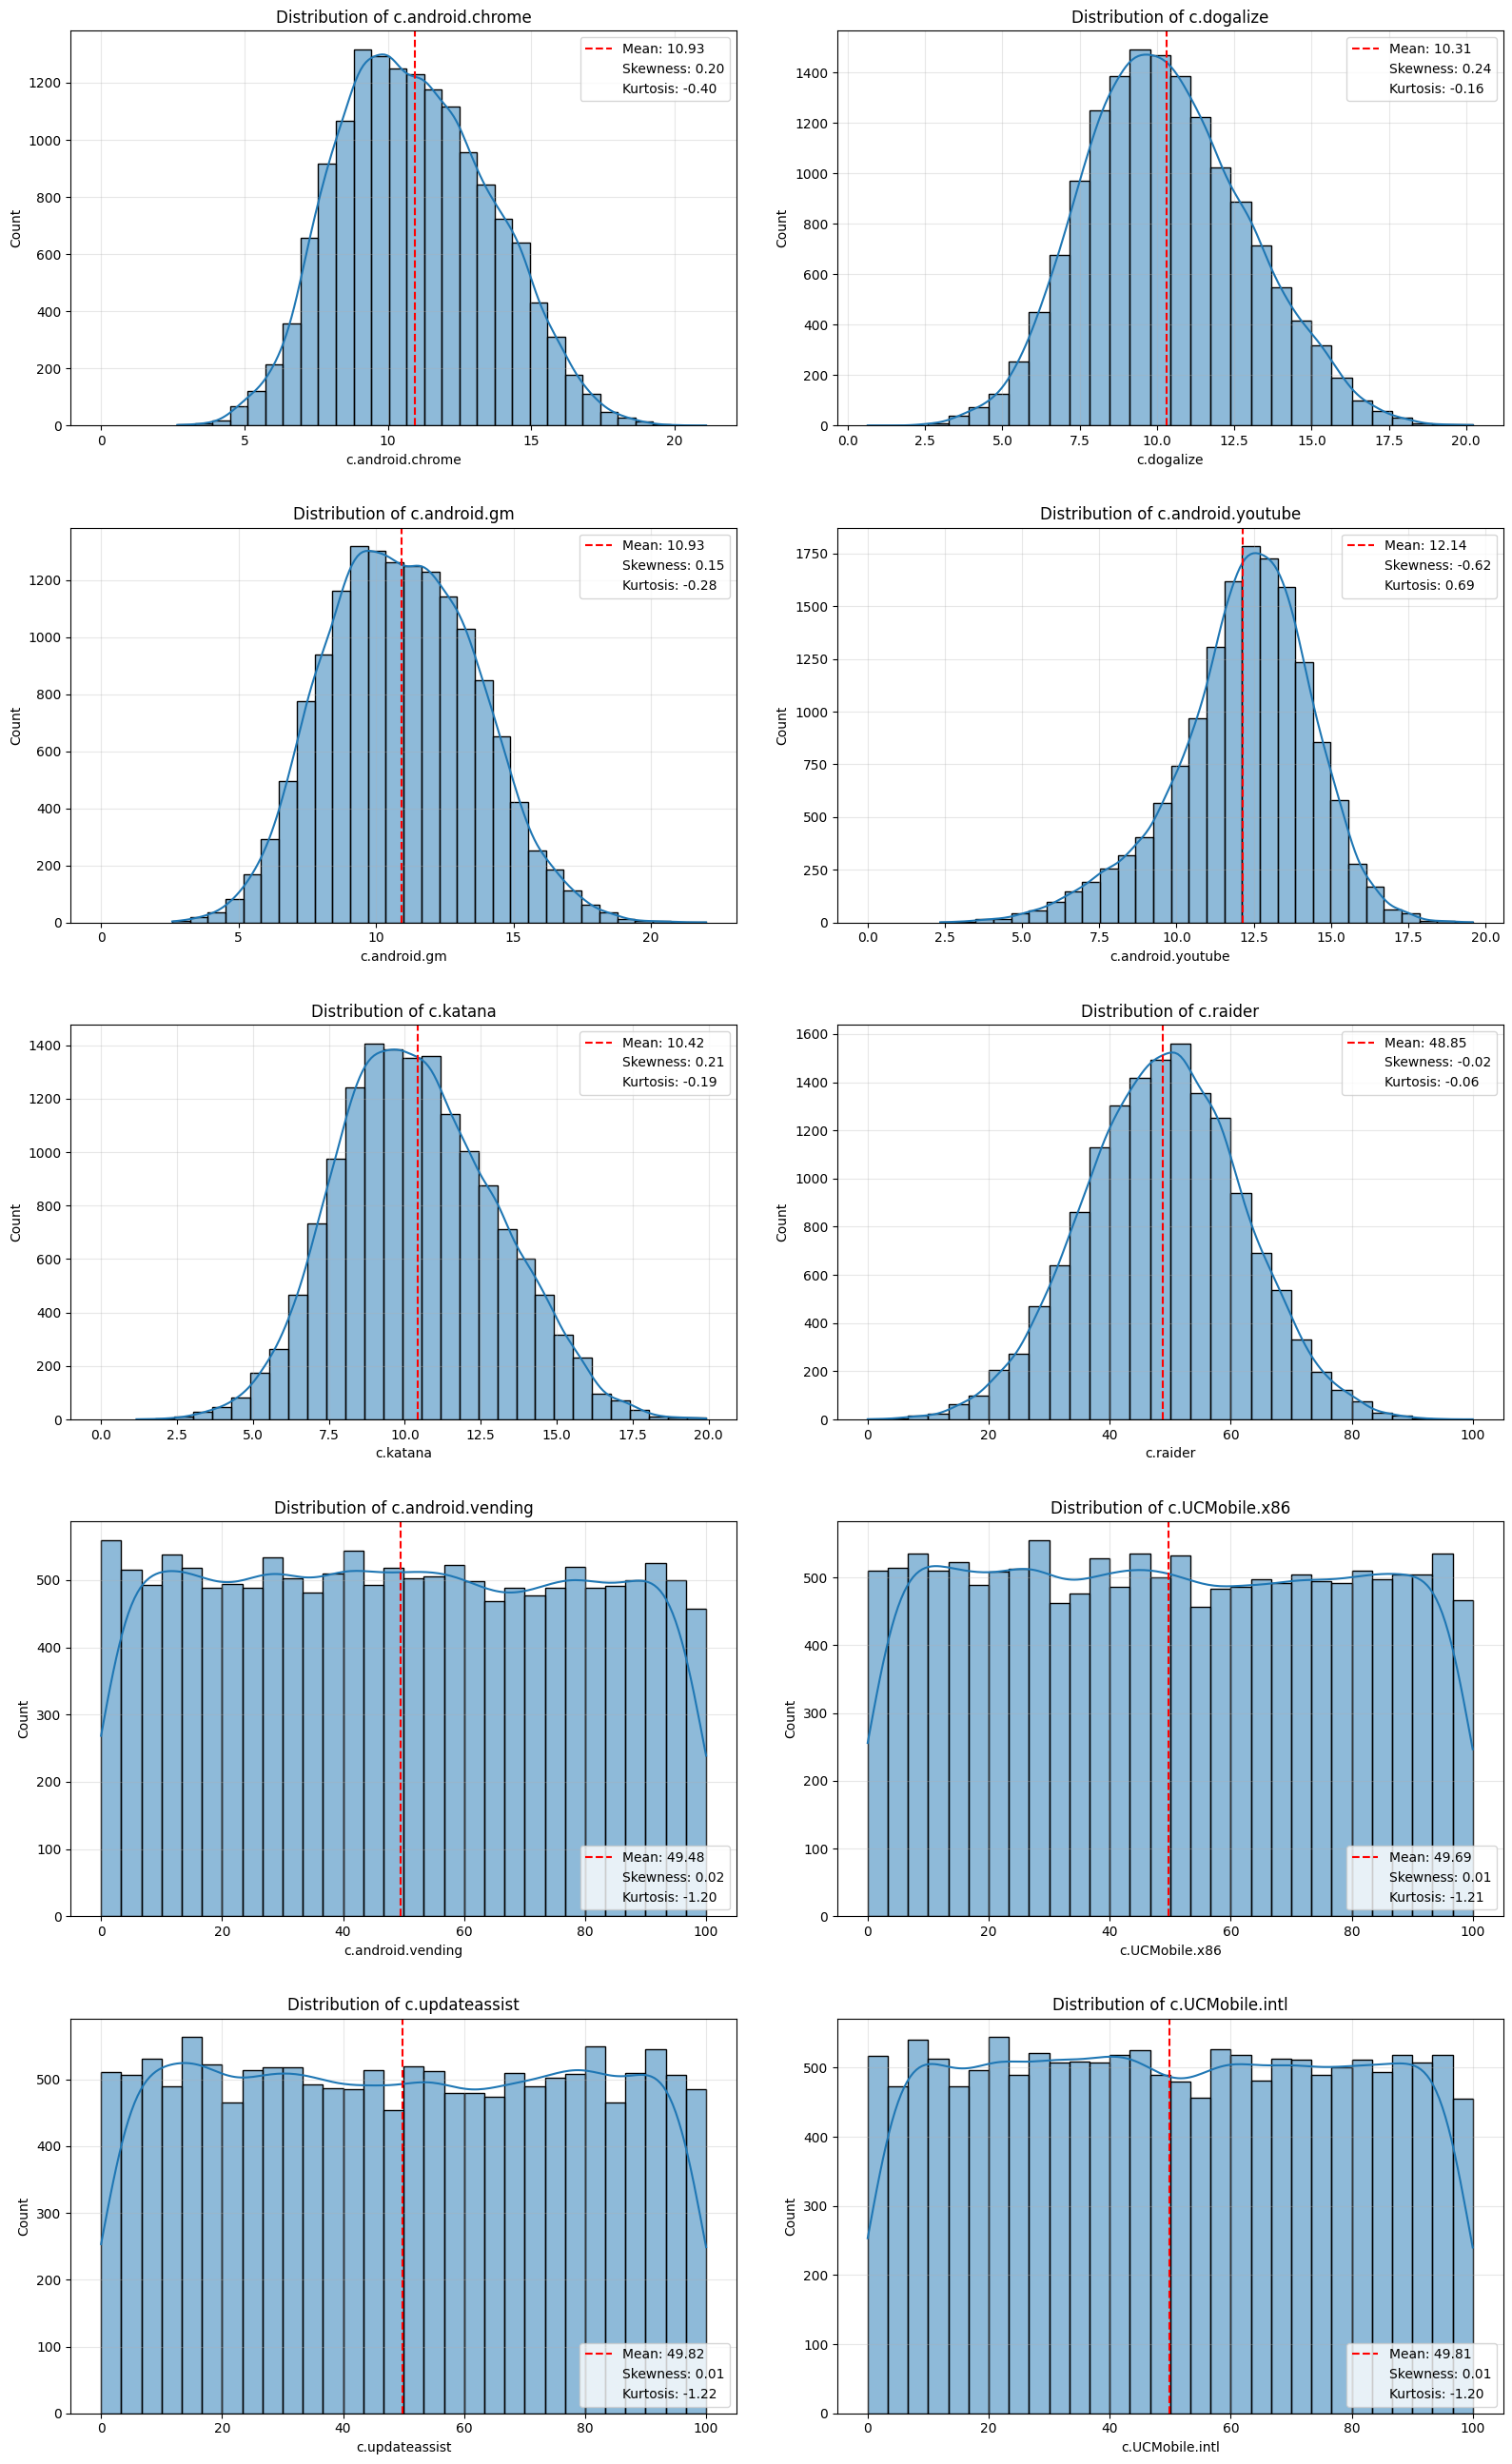

In [ ]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))


## Having all the data in a list, we can iterate over it and plot the histogram with KDE for each connection.
for i in range(len(all_data_connections)):
    sns.histplot(all_data_connections[i], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].axvline(
        all_means_connections[i], color="r", linestyle="--", label=f"Mean: {all_means_connections[i]:.2f}"
    )
    axes[i // 2, i % 2].axvline(
        linestyle="", label=f"Skewness: {shape_df.loc[all_str_connections[i]]['skew']:.2f}"
    )
    axes[i // 2, i % 2].axvline(
        linestyle="", label=f"Kurtosis: {shape_df.loc[all_str_connections[i]]['kurtosis']:.2f}"
    )
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

## Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

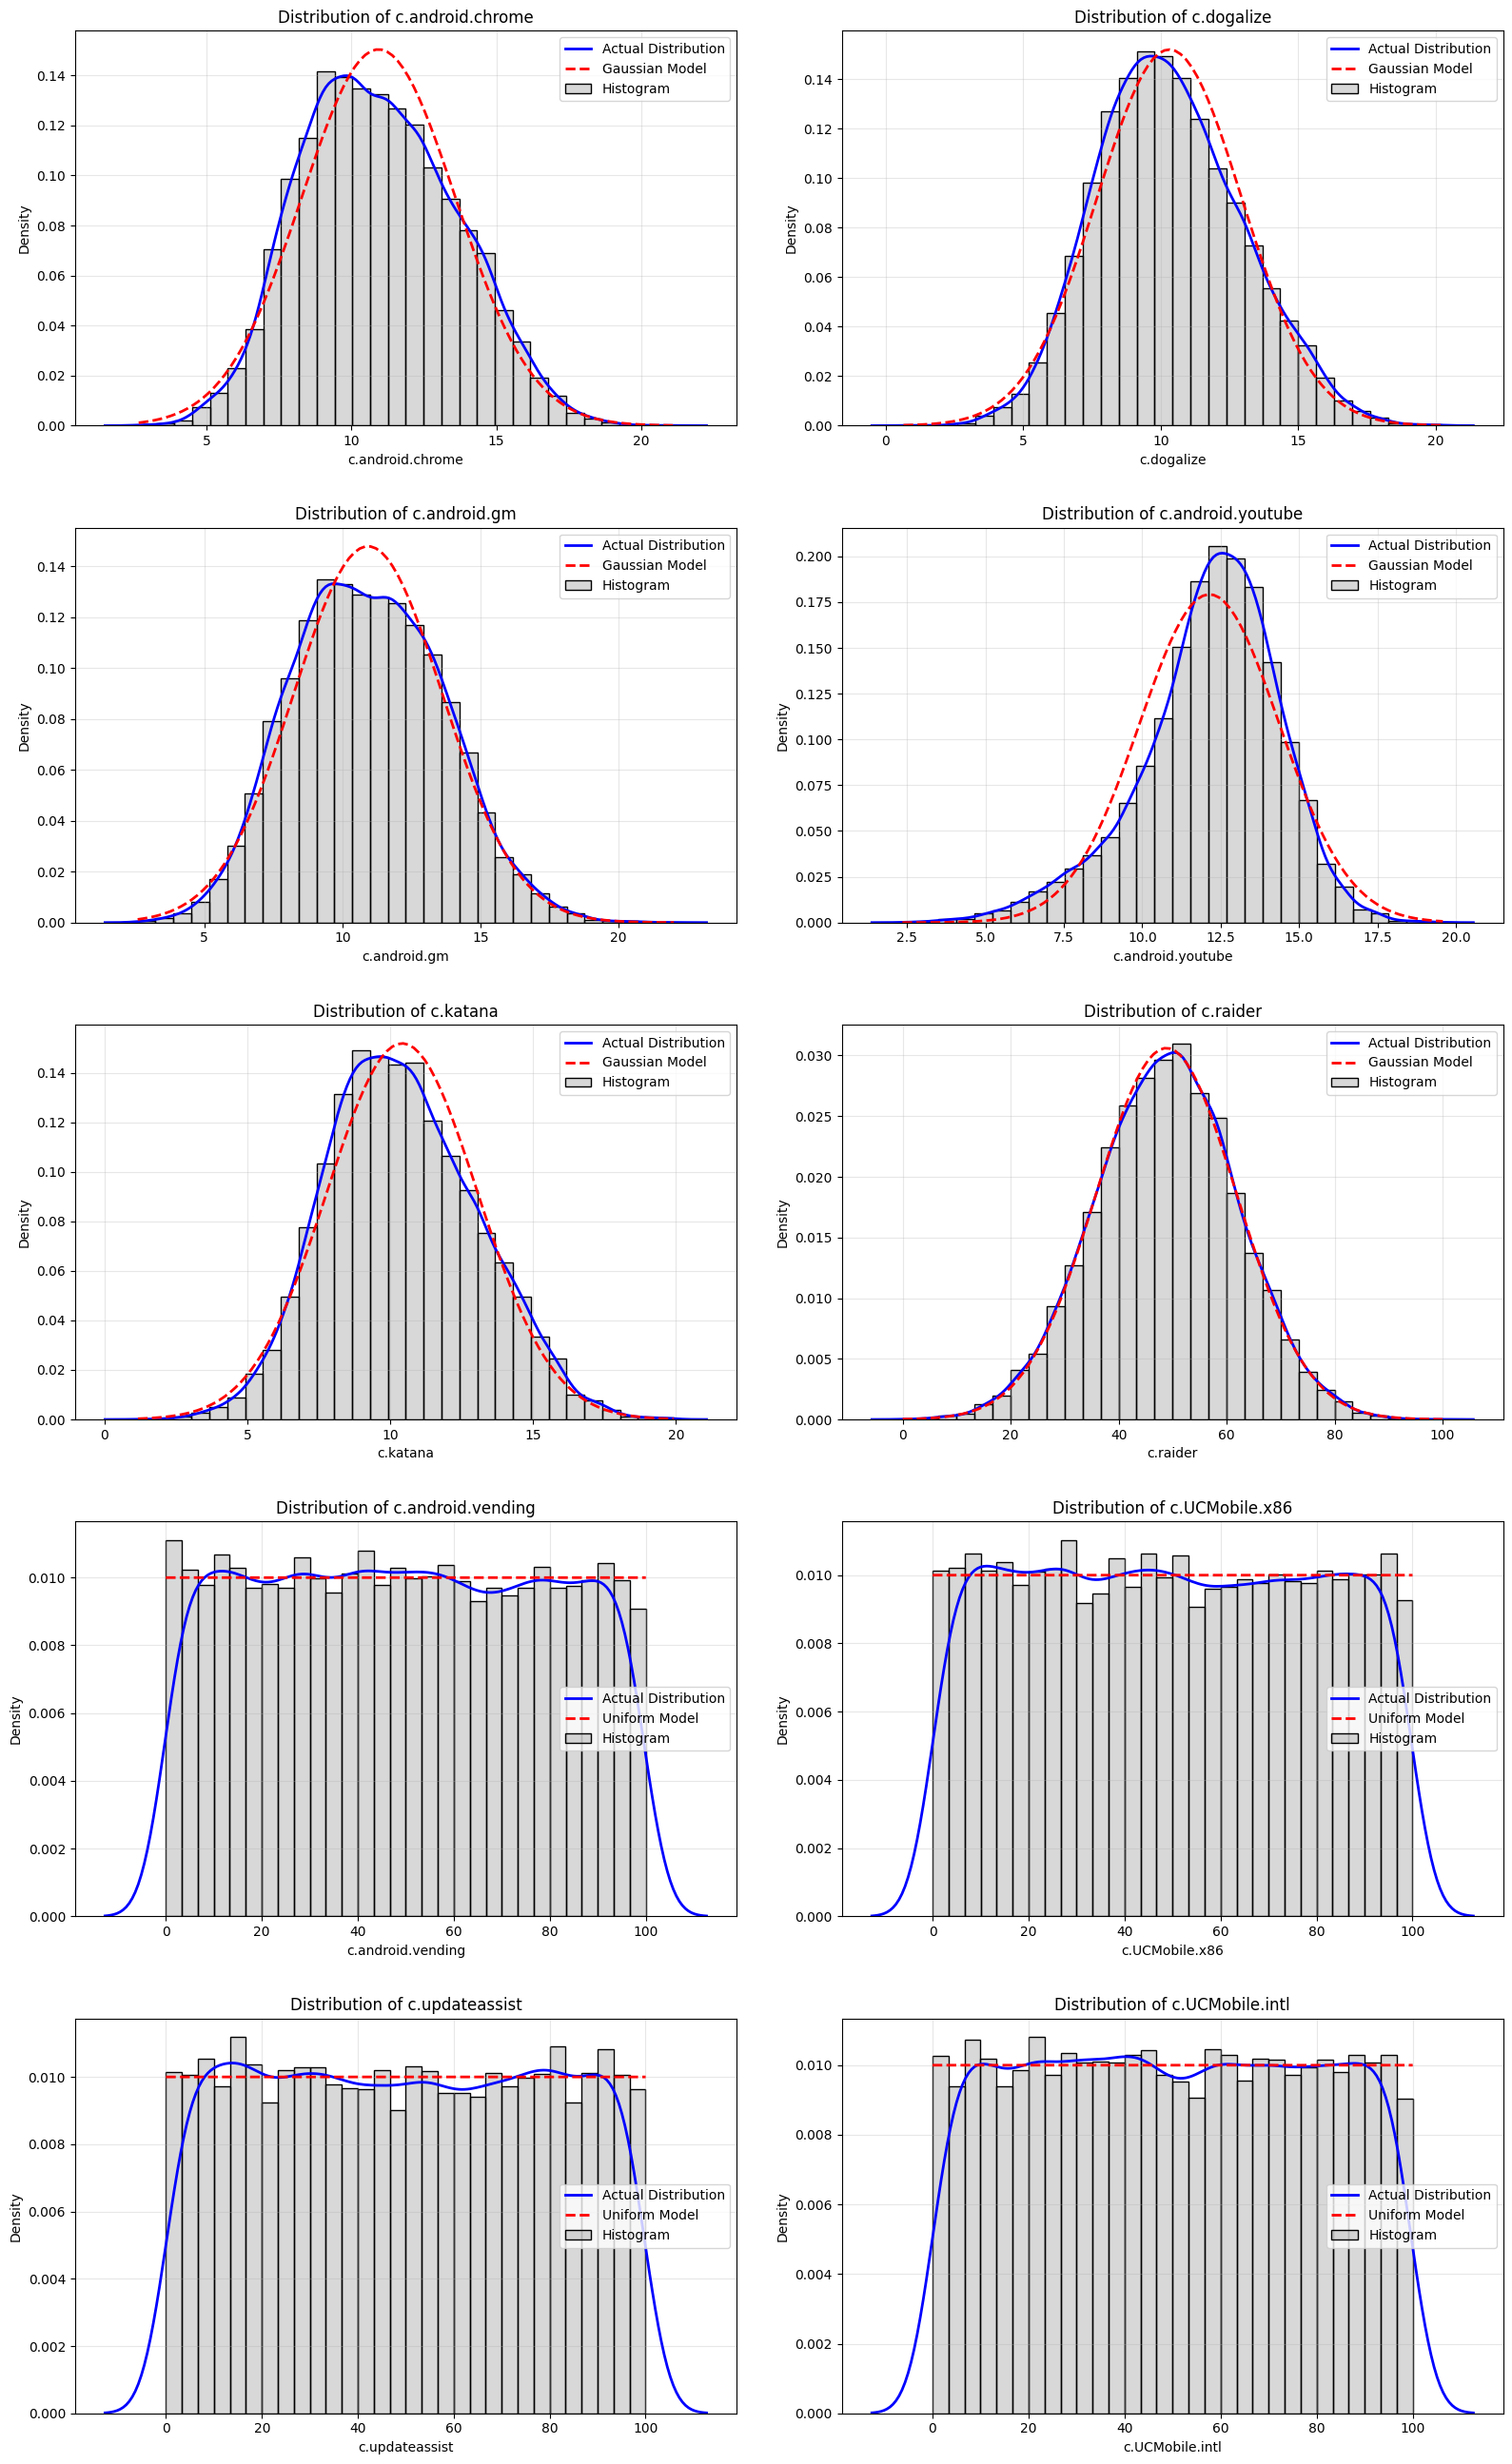

In [ ]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sns.histplot(
        data=all_data_connections[i],
        bins=30,
        stat="density",
        alpha=0.3,
        color="gray",
        label="Histogram",
        ax=axes[i // 2, i % 2],
    )
    sns.kdeplot(
        data=all_data_connections[i],
        color="blue",
        label="Actual Distribution",
        linewidth=2,
        ax=axes[i // 2, i % 2],
    )

    if i <= 5:  ## We know that first 6 connections are not uniform
        x = np.linspace(all_data_connections[i].min(), all_data_connections[i].max(), 100)
        gaussian = stats.norm.pdf(x, all_means_connections[i], all_std_connections[i])
        axes[i // 2, i % 2].plot(x, gaussian, color="red", linestyle="--", label="Gaussian Model", linewidth=2)

    else:
        a = all_data_connections[i].min()
        b = all_data_connections[i].max()
        x = np.linspace(a, b, all_data_connections[i].size)
        uniform_dist = stats.uniform(loc=a, scale=b - a)
        axes[i // 2, i % 2].plot(
            x, uniform_dist.pdf(x), color="red", linestyle="--", label="Uniform Model", linewidth=2
        )

    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)


## Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

#### Boxplots


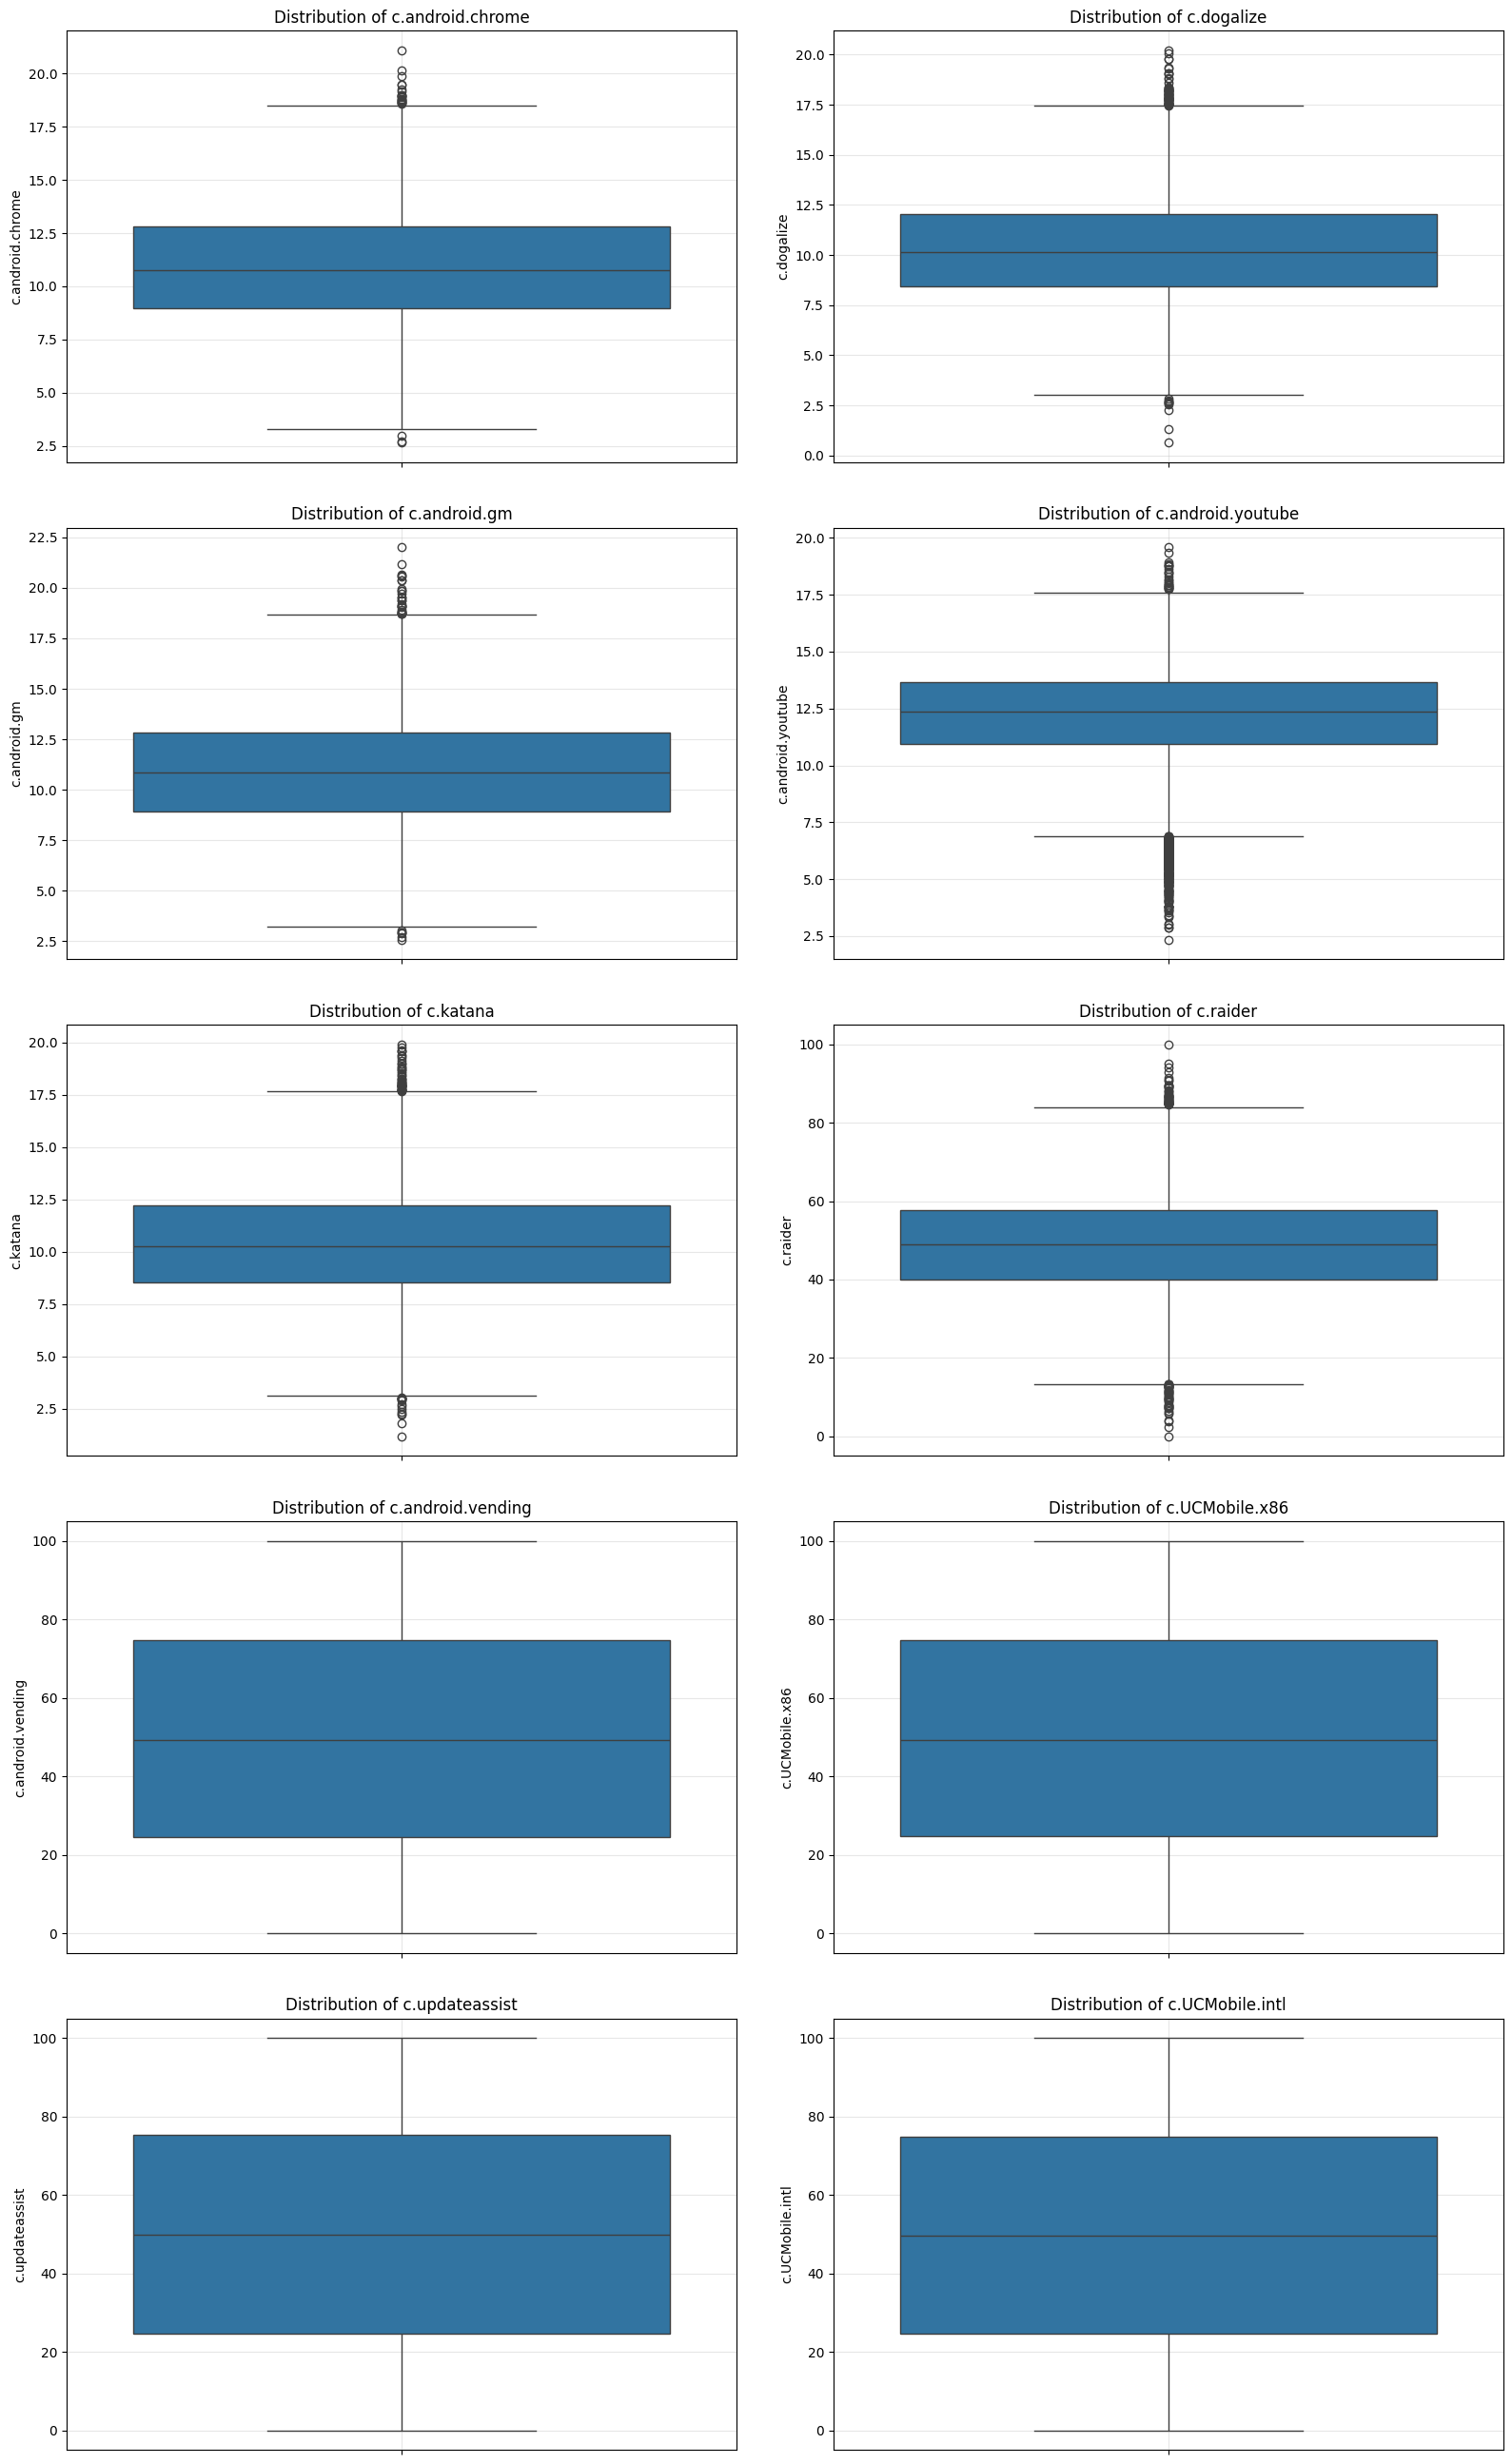

In [ ]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sns.boxplot(all_data_connections[i], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)

## Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

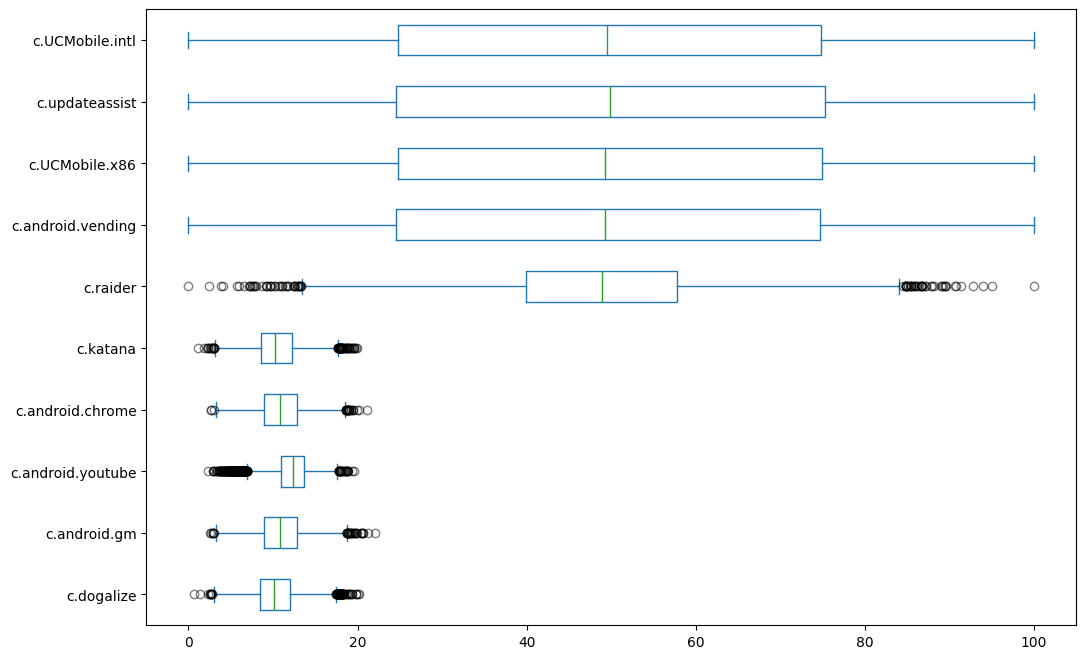

In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(12, 8), flierprops=dict(marker="o", alpha=0.5)
)
plt.show()

#### Q-Q plots


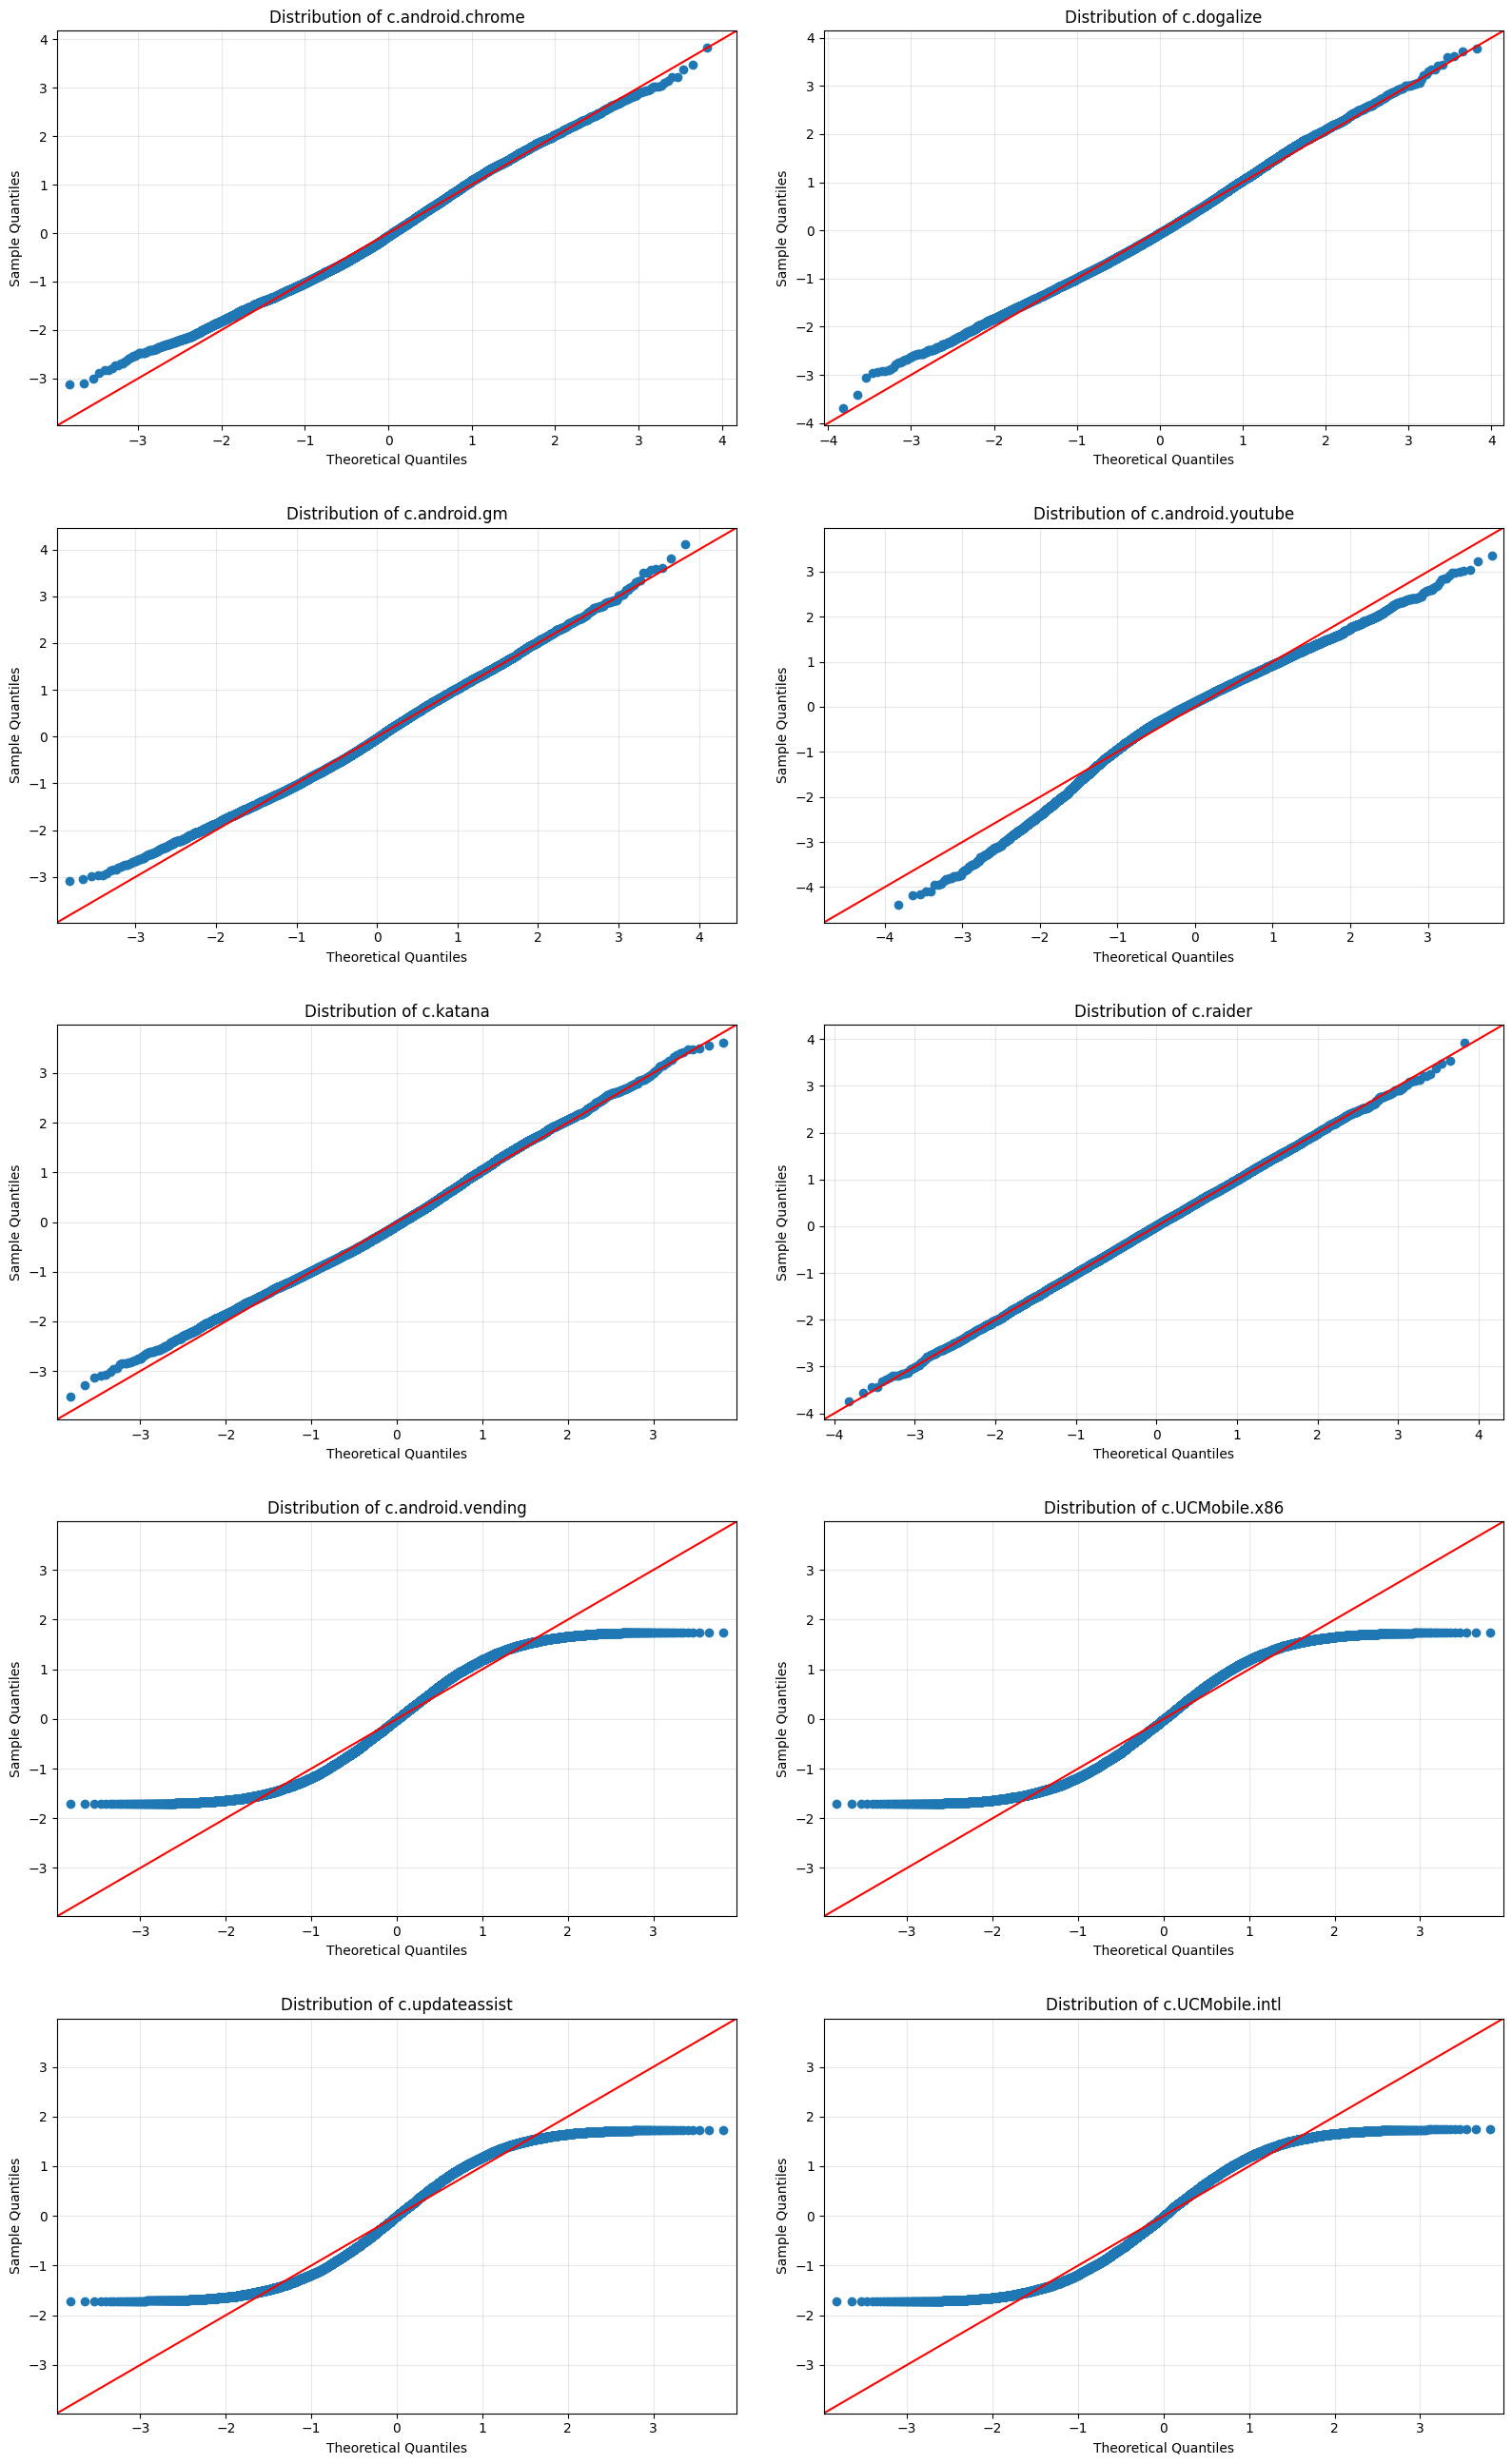

In [ ]:
_, axes = plt.subplots(5, 2, figsize=(16, 26))

for i in range(len(all_data_connections)):
    sm.qqplot(all_data_connections[i], fit=True, line="45", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_connections[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)

## Adjust the layout
plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

-   Only easily non-normal distributions to spot are the uniforms distributions ["c.andorid.vending", "c.UCMobile.x86", c.updateassist", c.UCMobile.intl"]


### Processes


#### Defining the variables


In [ ]:
chrome_data = dataset["processes"]["p.android.chrome"]
chrome_mean = chrome_data.mean()
chrome_std = chrome_data.std()

dogalize_data = dataset["processes"]["p.dogalize"]
dogalize_mean = dogalize_data.mean()
dogalize_std = dogalize_data.std()

katana_data = dataset["processes"]["p.katana"]
katana_mean = katana_data.mean()
katana_std = katana_data.std()

settings_data = dataset["processes"]["p.android.settings"]
settings_mean = settings_data.mean()
settings_std = settings_data.std()

system_data = dataset["processes"]["p.system"]
system_mean = system_data.mean()
system_std = system_data.std()

simulator_data = dataset["processes"]["p.simulator"]
simulator_mean = simulator_data.mean()
simulator_std = simulator_data.std()

all_str_processes: list[str] = [
    "p.android.chrome",
    "p.dogalize",
    "p.katana",
    "p.android.settings",
    "p.system",
    "p.simulator",
]

all_data_processes: list[pd.Series] = [
    chrome_data,
    dogalize_data,
    katana_data,
    settings_data,
    system_data,
    simulator_data,
]

all_means_processes: list[float] = [
    chrome_mean,
    dogalize_mean,
    katana_mean,
    settings_mean,
    system_mean,
    simulator_mean,
]

all_std_processes: list[float] = [
    chrome_std,
    dogalize_std,
    katana_std,
    settings_std,
    system_std,
    simulator_std,
]

#### Measure of dispersion


In [ ]:
df = dataset["processes"][all_str_processes].describe()
df.loc["full_range"] = df.loc["max"] - df.loc["min"]
df.loc["interquartile_range"] = df.loc["75%"] - df.loc["25%"]
df

,p.android.chrome,p.dogalize,p.katana,p.android.settings,p.system,p.simulator
count,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000,15108.000000
mean,9.790817,50.037140,49.852339,11.499864,10.397043,50.022306
std,2.436871,28.833214,28.967083,2.679572,2.664877,28.957691
min,0.000000,0.000000,0.000000,1.570430,0.616400,0.000000
25%,8.122188,25.007917,24.522633,9.656940,8.453595,24.879258
50%,9.641190,50.400705,49.514105,11.619575,10.351115,50.338015
75%,11.364935,75.002775,75.035590,13.414413,12.327390,74.949060
max,19.855360,100.000000,100.000000,20.927500,19.216320,100.000000
full_range,19.855360,100.000000,100.000000,19.357070,18.599920,100.000000
interquartile_range,3.242747,49.994858,50.512957,3.757473,3.873795,50.069803


#### Measure of center


In [ ]:
apps = all_str_processes

means = all_means_processes

medians = [
    chrome_data.median(),
    dogalize_data.median(),
    katana_data.median(),
    settings_data.median(),
    system_data.median(),
    simulator_data.median(),
]

max_values = []
most_occurring_values = []

value_counts = chrome_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = dogalize_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = katana_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = settings_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = system_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())


value_counts = simulator_data.value_counts()
max_val = value_counts.max()
max_values.append(max_val)
most_occurring_values.append(value_counts[value_counts == max_val].index.tolist())

for i in range(len(most_occurring_values)):
    most_occurring_values[i] = most_occurring_values[i][: min(3, len(most_occurring_values[i]))]


data = {
    "process": apps,
    "mean": means,
    "median": medians,
    "mode_count": max_values,
    "mode_values": most_occurring_values,
}

df = pd.DataFrame(data)
df

,process,mean,median,mode_count,mode_values
0,p.android.chrome,9.790817,9.641190,3,"[9.25661, 9.09418, 9.60399]"
1,p.dogalize,50.037140,50.400705,3,[95.18917]
2,p.katana,49.852339,49.514105,2,"[24.32851, 76.86749, 76.0943]"
3,p.android.settings,11.499864,11.619575,3,[10.65882]
4,p.system,10.397043,10.351115,3,[11.54941]
5,p.simulator,50.022306,50.338015,3,[72.82827]


#### Measure of shape


In [ ]:
data = {
    "process": all_str_processes,
    "skew": [
        stats.skew(chrome_data),
        stats.skew(dogalize_data),
        stats.skew(katana_data),
        stats.skew(settings_data),
        stats.skew(system_data),
        stats.skew(simulator_data),
    ],
    "kurtosis": [
        stats.kurtosis(chrome_data),
        stats.kurtosis(dogalize_data),
        stats.kurtosis(katana_data),
        stats.kurtosis(settings_data),
        stats.kurtosis(system_data),
        stats.kurtosis(simulator_data),
    ],
}

shape_df = pd.DataFrame(data)
shape_df["result skew"] = shape_df["skew"].apply(skewness_type)
shape_df["result kurtosis"] = shape_df["kurtosis"].apply(kurtosis_type)
shape_df.set_index("process", inplace=True)
shape_df

,skew,kurtosis,result skew,result kurtosis
process,,,,
p.android.chrome,0.221976,0.040229,Approximately Symmetric,Approximately Normal Kurtosis
p.dogalize,-0.015236,-1.198147,Approximately Symmetric,Negative Kurtosis
p.katana,0.006712,-1.212223,Approximately Symmetric,Negative Kurtosis
p.android.settings,-0.160093,-0.224145,Approximately Symmetric,Approximately Normal Kurtosis
p.system,0.016187,-0.377024,Approximately Symmetric,Approximately Normal Kurtosis
p.simulator,-0.001083,-1.205955,Approximately Symmetric,Negative Kurtosis


#### Histograms with KDE


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

for i in range(len(all_data_processes)):
    sns.histplot(all_data_processes[i], bins=30, kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].axvline(
        all_means_processes[i], color="r", linestyle="--", label=f"Mean: {all_means_processes[i]:.2f}"
    )
    axes[i // 2, i % 2].axvline(linestyle="", label=f"Skewness: {shape_df.loc[all_str_processes[i]]['skew']:.2f}")
    axes[i // 2, i % 2].axvline(
        linestyle="", label=f"Kurtosis: {shape_df.loc[all_str_processes[i]]['kurtosis']:.2f}"
    )
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

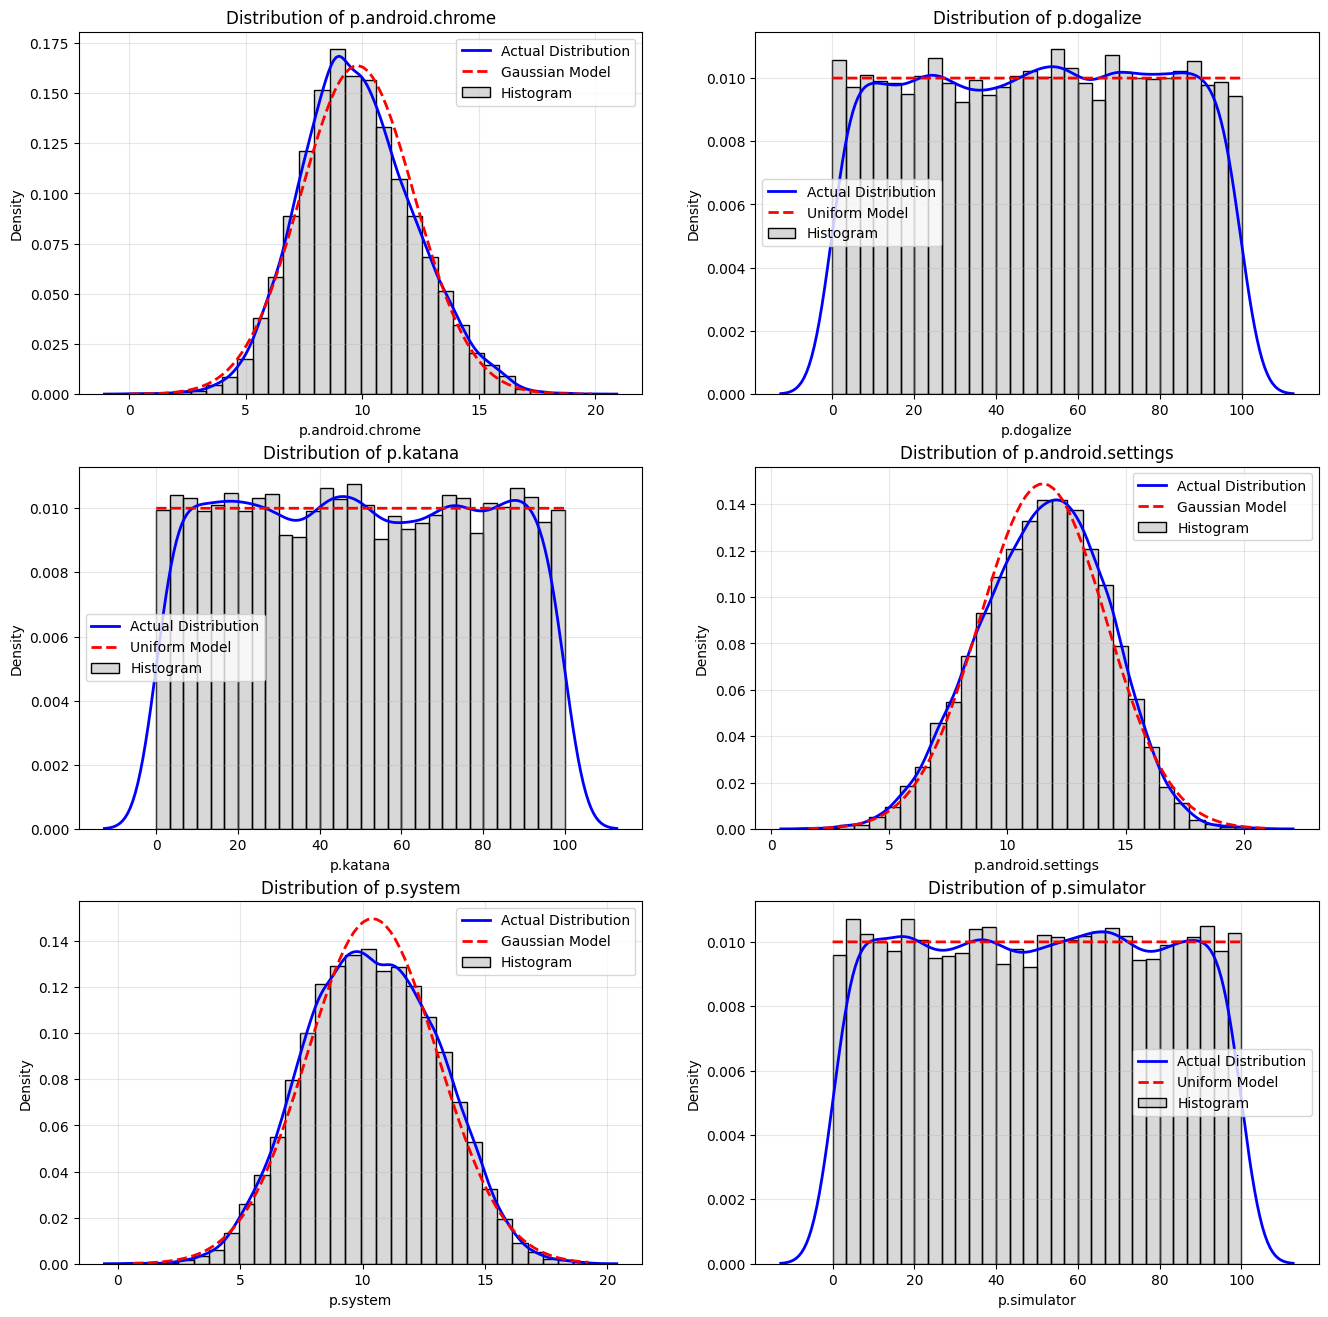

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))

gaussian_models = [chrome_data, settings_data, system_data]

for i in range(len(all_data_processes)):
    sns.histplot(
        data=all_data_processes[i],
        bins=30,
        stat="density",
        alpha=0.3,
        color="gray",
        label="Histogram",
        ax=axes[i // 2, i % 2],
    )
    sns.kdeplot(
        data=all_data_processes[i],
        color="blue",
        label="Actual Distribution",
        linewidth=2,
        ax=axes[i // 2, i % 2],
    )

    if any(all_data_processes[i] is model for model in gaussian_models):
        x = np.linspace(all_data_processes[i].min(), all_data_processes[i].max(), 100)
        gaussian = stats.norm.pdf(x, all_means_processes[i], all_std_processes[i])
        axes[i // 2, i % 2].plot(x, gaussian, color="red", linestyle="--", label="Gaussian Model", linewidth=2)

    else:
        a = all_data_processes[i].min()
        b = all_data_processes[i].max()
        x = np.linspace(a, b, all_data_processes[i].size)
        uniform_dist = stats.uniform(loc=a, scale=b - a)
        axes[i // 2, i % 2].plot(
            x, uniform_dist.pdf(x), color="red", linestyle="--", label="Uniform Model", linewidth=2
        )

    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True, alpha=0.3)

#### Boxplots


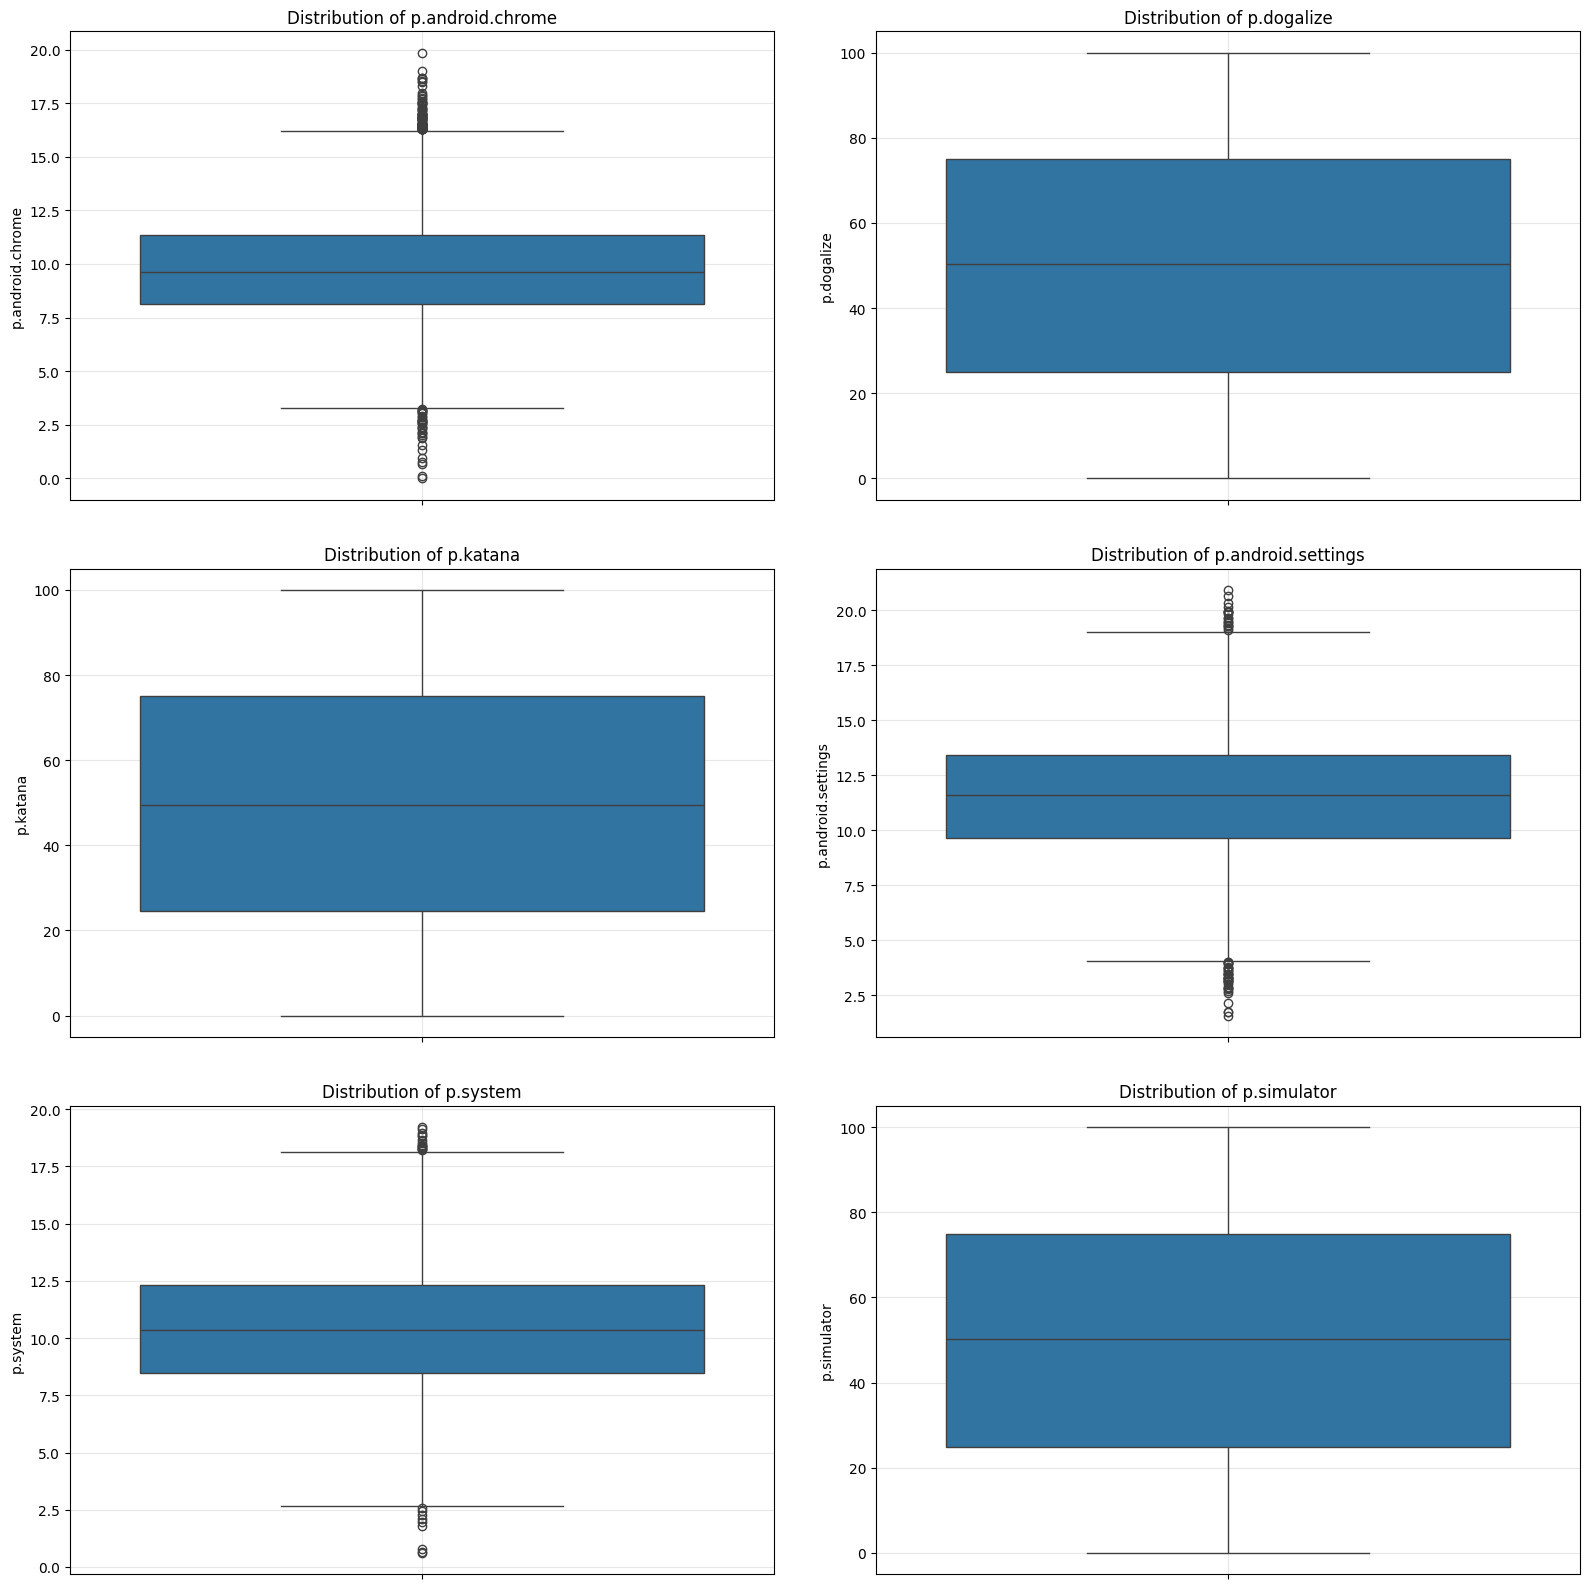

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))

for i in range(len(all_data_processes)):
    sns.boxplot(all_data_processes[i], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)


plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

TODO: pridaj spolu boxpoot


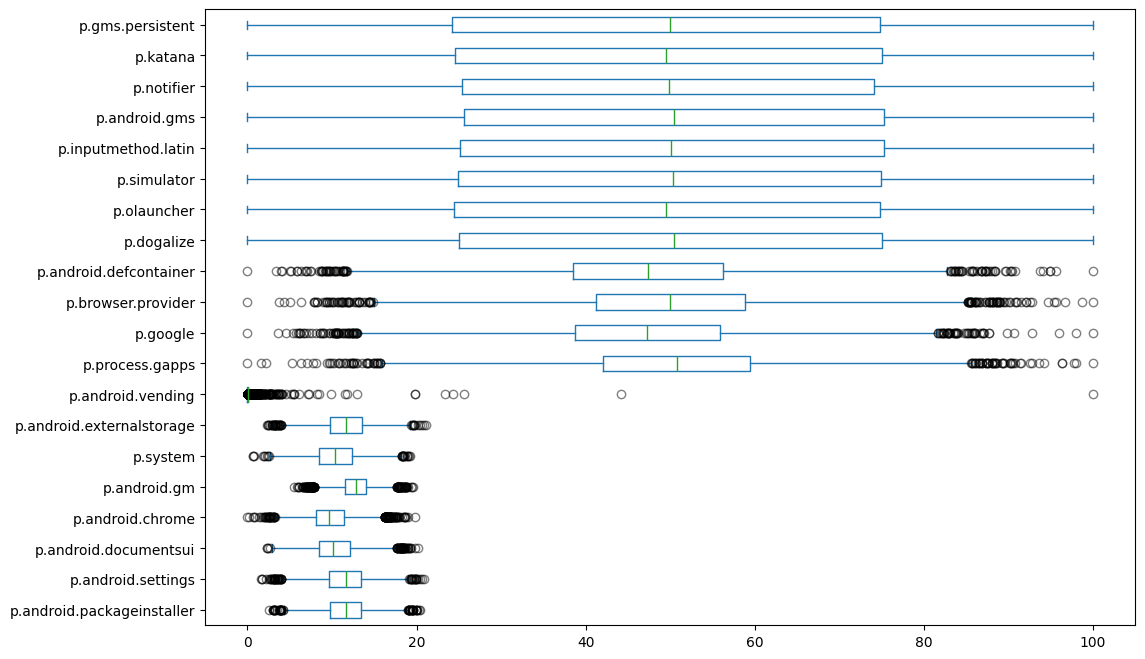

In [ ]:
dataset["processes"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(12, 8), flierprops=dict(marker="o", alpha=0.5)
)
plt.show()

#### Q-Q plots


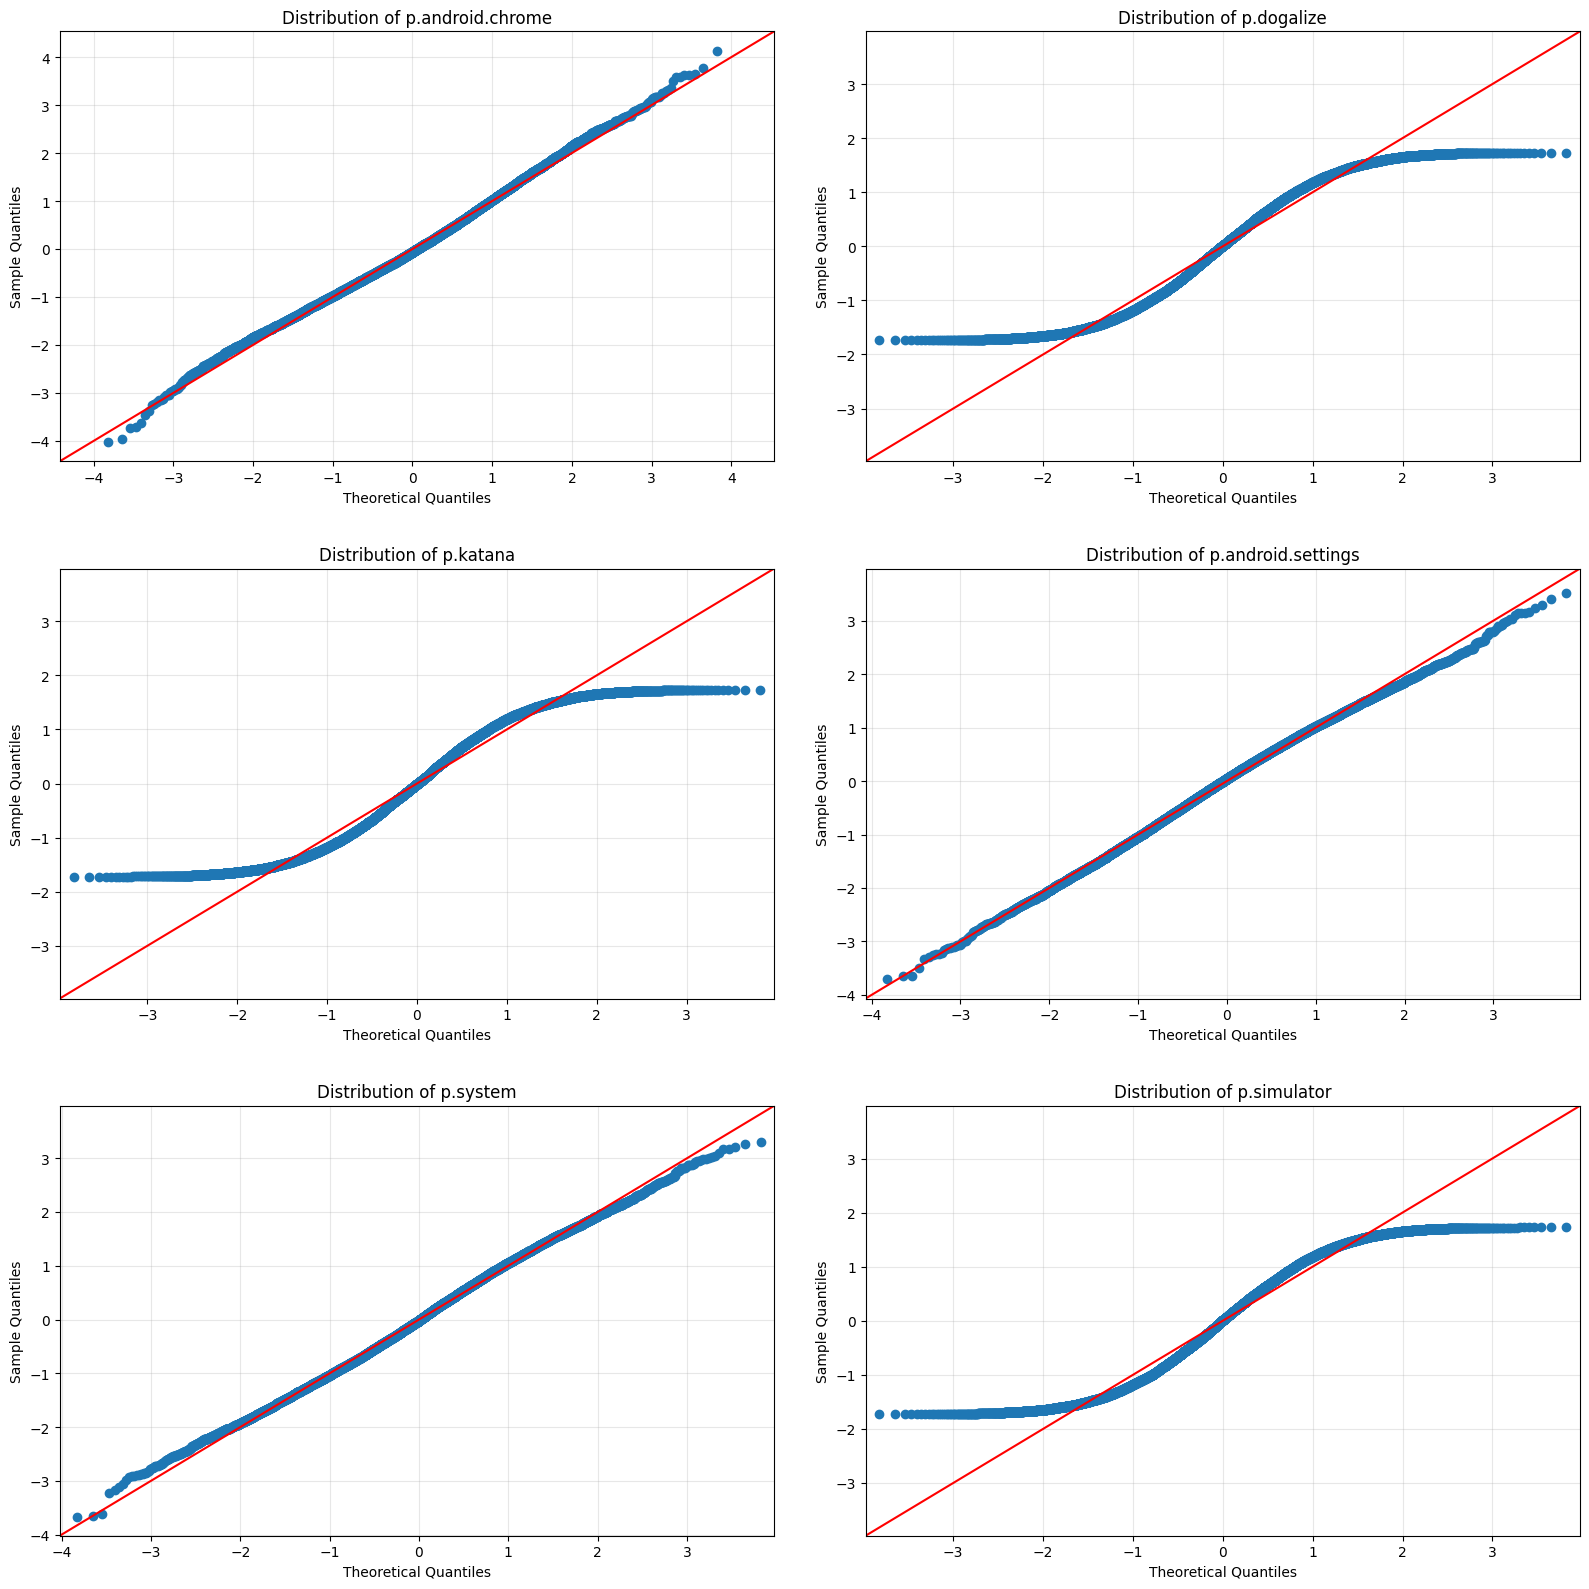

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(16, 16))


for i in range(len(all_data_processes)):
    sm.qqplot(all_data_processes[i], fit=True, line="45", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribution of {all_str_processes[i]}")
    axes[i // 2, i % 2].grid(True, alpha=0.3)


plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

## C.)


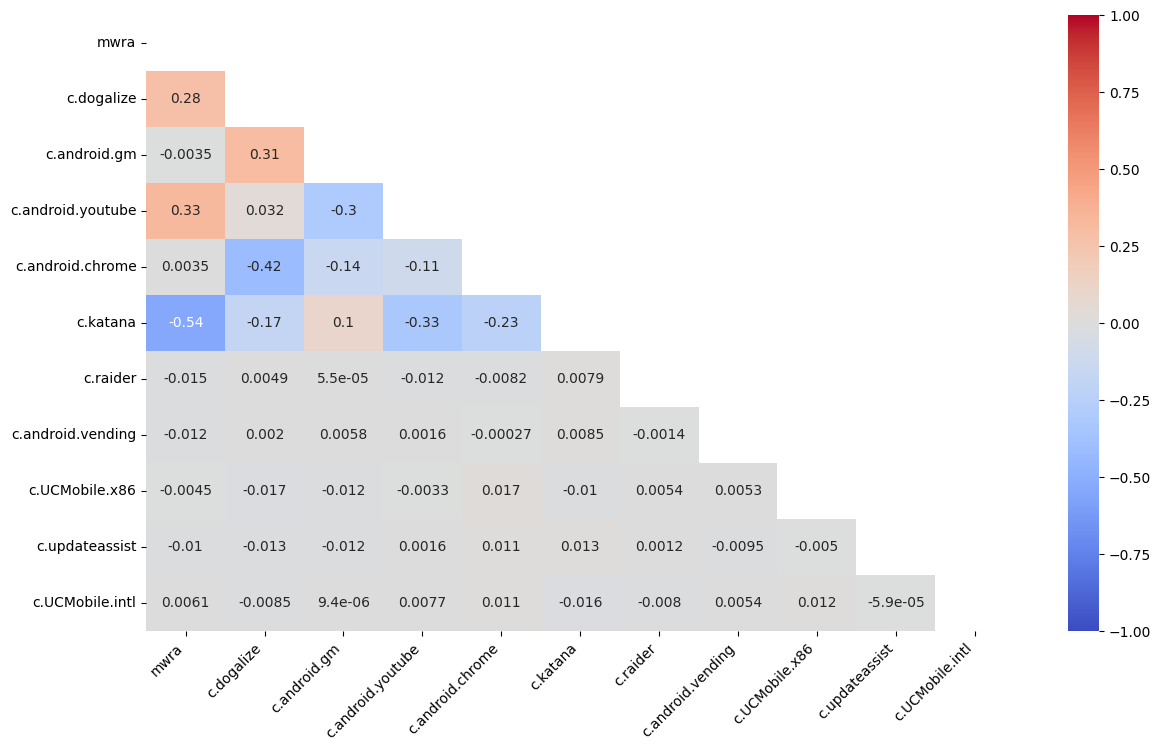

In [ ]:
matica = dataset["connections"].iloc[:, 2:].corr()

mask = np.triu(np.ones_like(matica, dtype=bool))
plt.figure(figsize=(14, 8))
sns.heatmap(matica, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.show()

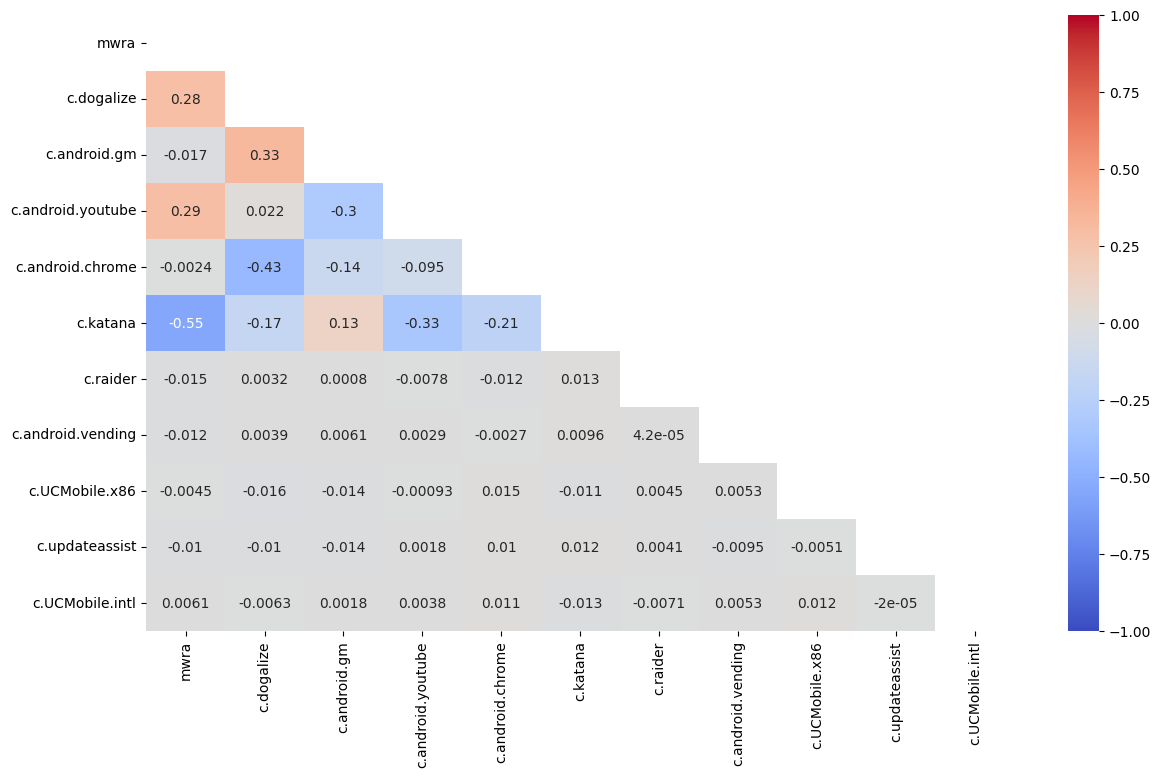

In [ ]:
matica = dataset["connections"].iloc[:, 2:].corr(method="spearman")

mask = np.triu(np.ones_like(matica, dtype=bool))
plt.figure(figsize=(14, 8))
sns.heatmap(matica, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

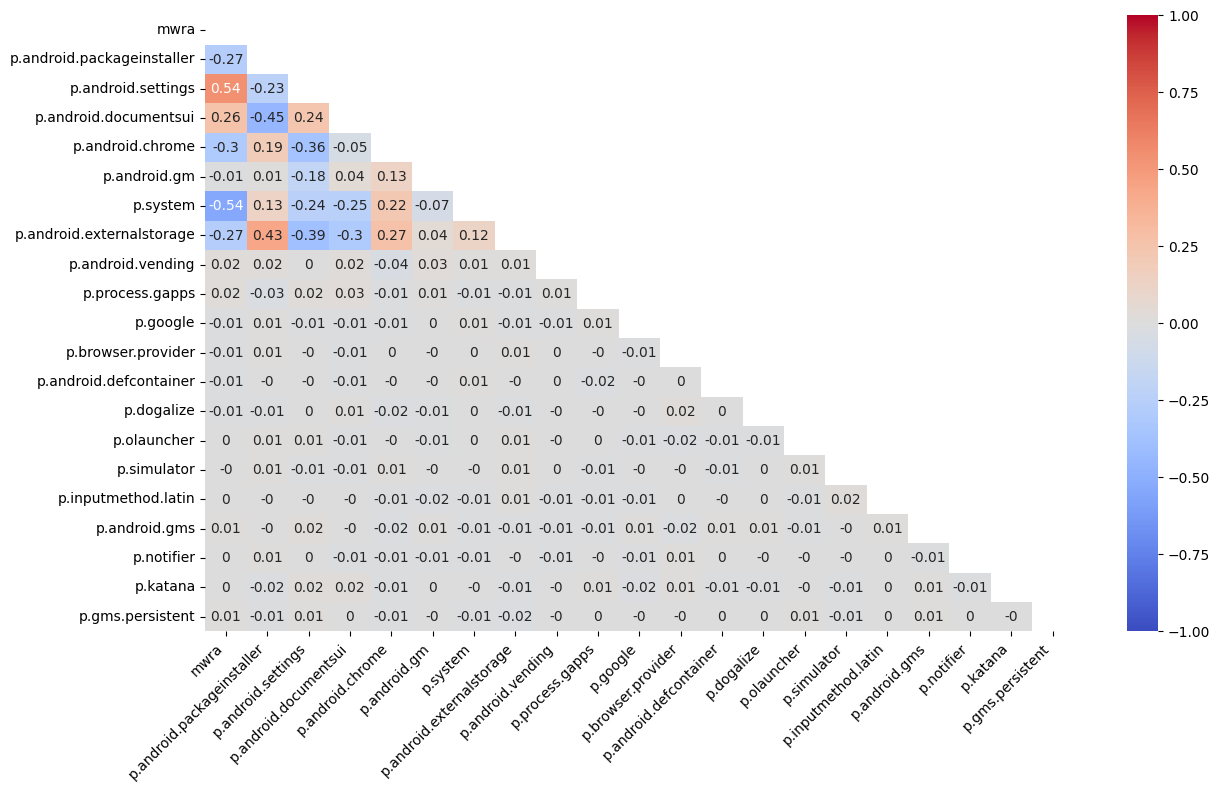

In [ ]:
matica = dataset["processes"].iloc[:, 2:].corr()
matica = matica.round(2)

mask = np.triu(np.ones_like(matica, dtype=bool))
plt.figure(figsize=(14, 8))

sns.heatmap(matica, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
sns.pairplot(dataset["connections"].iloc[:, 2:], hue="mwra", diag_kind="kde", palette={0.0: "blue", 1.0: "red"})
plt.show()

In [ ]:
processes_columns = ["p.android.chrome", "p.dogalize", "p.katana", "p.android.gm", "p.android.vending"]
connections_columns = ["c.android.chrome", "c.dogalize", "c.katana", "c.android.gm", "c.android.vending"]

combined_df = pd.concat(
    [dataset["processes"][processes_columns], dataset["connections"][connections_columns]], axis=1
)

correlation_matrix = combined_df.corr(method="pearson")

filtered_corr = correlation_matrix.loc[processes_columns, connections_columns]

mask = np.ones_like(filtered_corr, dtype=bool)
np.fill_diagonal(mask, False)

sns.heatmap(
    filtered_corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=connections_columns,
    yticklabels=processes_columns,
)
plt.xlabel("Connections")
plt.ylabel("Processes")
plt.title('Correlation between same attributes in "connections" and "processes"', pad=20)
plt.xticks(rotation=45, ha="right")
plt.show()

-   The same attributes in "connections" and "processes" don't have influence at each other.


## D.)


In [ ]:
connections_list = all_str_connections
mwra_list = ["mwra"]

combined_df = pd.concat([dataset["connections"][connections_list], dataset["connections"][mwra_list]], axis=1)

correlation_matrix = combined_df.corr(method="pearson")

filtered_corr = correlation_matrix.loc[connections_list, mwra_list]

plt.figure(figsize=(8, 6))
sns.heatmap(
    filtered_corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=mwra_list,
    yticklabels=connections_list,
)
plt.xlabel("Connections")
plt.ylabel("Processes")
plt.show()

In [ ]:
processes_list = dataset["processes"].columns[3:]
mwra_list = ["mwra"]

combined_df = pd.concat([dataset["processes"][processes_list], dataset["processes"][mwra_list]], axis=1)

correlation_matrix = combined_df.corr(method="pearson")

filtered_corr = correlation_matrix.loc[processes_list, mwra_list]

plt.figure(figsize=(8, 10))
sns.heatmap(
    filtered_corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=mwra_list,
    yticklabels=processes_list,
)
plt.xlabel("Connections")
plt.ylabel("Processes")
plt.show()

In [ ]:
conn_strings = ["c.android.youtube", "c.dogalize", "c.katana"]
proc_strings = [
    "p.android.settings",
    "p.android.documentsui",
    "p.android.packageinstaller",
    "p.android.externalstorage",
    "p.android.chrome",
    "p.system",
]

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, conn in enumerate(conn_strings):
    sns.regplot(
        x=dataset["connections"]["mwra"], y=dataset["connections"][conn], ax=axes[0, i], line_kws={"color": "red"}
    )
    axes[0, i].set_title(f"mwra vs {conn}")
    axes[0, i].set_xlabel("mwra")

for i, proc in enumerate(proc_strings):
    sns.regplot(
        x=dataset["processes"]["mwra"],
        y=dataset["processes"][proc],
        ax=axes[i // 3 + 1, i % 3],
        line_kws={"color": "red"},
    )
    axes[i // 3 + 1, i % 3].set_title(f"mwra vs {proc}")
    axes[i // 3 + 1, i % 3].set_xlabel("mwra")

plt.tight_layout()
plt.show()

In [ ]:
df = dataset["devices"].copy()
df["continent"] = dataset["devices"]["location"].apply(lambda x: x.split("/")[0])
df = df.merge(dataset["connections"][["imei", "mwra"]], on="imei")
df = df.groupby("continent").agg({"mwra": "mean"}).sort_values(by="mwra", ascending=False)
df["mwra"] = (df["mwra"] * 100).round(2)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="mwra", y=df.index, hue="mwra", data=df, palette=sns.color_palette("light:#5A9", as_cmap=True))

for index, value in enumerate(df["mwra"]):
    ax.text(value + 0.05, index, f"{value:.2f}%", va="center")

plt.title("Percentage of MWRA by Continent")
ax.set_ylabel("")
plt.xlim(df["mwra"].min() - 0.5, df["mwra"].max() + 0.5)
plt.legend().remove()
plt.show()

-   This graph shows the percentage of True **mwra** in each continent
-   India has the highest percentage of True **mwra** of 64.66%
-   Europe has the 2nd highest percentage of True **mwra** of 62.67%
-   India has also the biggest leap of ~2%, other countries in graph has ~0.5% leap


## E.)


Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu, napr. sú
niektoré atribúty medzi sebou závislé? od ktorých atribútov závisí predikovaná
premenná? či je potrebné kombinovať záznamy z viacerých súborov?


#### Correlations

Connections:

-   Correlation matrix for **mwra** in **connections** shows slight correlations between **c.dogalize** and **c.android.youtube**
-   Surprisingly there is a negative correlation between **c.katana**

Processes:

-   Correlation matrix for **mwra** in **processes** shows slight correlation between **p.android.settings**
-   There is also slight negative correlation between **p.system**

#### Combination of data

-   We can combine data from **connections** and **processes** by **imei** to get more data, especially important data that will be crucial in our model


# 1.2 - Identification of problems, integration and data cleaning


## A.)


In 1.1-A we already transformed the "ts" column to datetime. WIth this we can expect every instance to be of the same format, if there were any errors in the data, the function would throw an error.

But here is also a simple function to check if the data is in the correct format.


In [ ]:
def check_correct_format(date: str) -> bool:
    if date[4] == "-" and date[7] == "-" and date[10] == " " and date[13] == ":" and date[16] == ":":
        return True
    print(f"Date {date} is not in correct format")
    return False


# Since we already changed the format of the datetime, we will read cvs again
df = pd.read_csv("../dataset/connections.csv", sep="\t")
bool_val = df["ts"].apply(check_correct_format).all()
print(bool_val)

df = pd.read_csv("../dataset/processes.csv", sep="\t")
bool_val = df["ts"].apply(check_correct_format).all()
print(bool_val)

-   The format of date time in "connections" and "processes" is correct


In [ ]:
dataset["profiles"][["registration", "birthdate"]].sample(5, random_state=42)

-   we can see that the date formats in columns "registration" are different


Convert objects to date format, with argument for mixed formats and errors='coerce' to convert invalid dates to NaT. (We already did this in 1.1-A)


In [ ]:
dataset["profiles"]["registration"] = pd.to_datetime(
    dataset["profiles"]["registration"], format="mixed", errors="coerce"
)
dataset["profiles"]["birthdate"] = pd.to_datetime(
    dataset["profiles"]["birthdate"], format="mixed", errors="coerce"
)

In [ ]:
dataset["profiles"][["registration", "birthdate"]].sample(5, random_state=42)

In [ ]:
for key in dataset:
    has_missing_values = dataset[key].isnull().values.any()
    print(
        f"DataFrame {key:<12} has {dataset[key].isnull().sum().sum() if has_missing_values else 'no':<4} missing values"
    )

-   We see that **profiles** have some missing values


In [ ]:
missing_columns = dataset["profiles"].columns[dataset["profiles"].isnull().any()]
print("Columns with missing values:", missing_columns)

-   We can see the columns with missing values in **profiles** are: "address", "job", "residence", "birthdate"
-   These columns hold no important information for our analysis, so we can drop this table in later part


In [ ]:
for key in dataset:
    has_duplicates = dataset[key].duplicated().any()
    print(f'DataFrame {key:<12} has {dataset[key].duplicated().sum() if has_duplicates else "no":<4} duplicates')

Duplicates in **connections**


In [ ]:
dataset["connections"][dataset["connections"].duplicated(keep="first")].sample(5, random_state=42)

Duplicates in **devices**


In [ ]:
dataset["devices"][dataset["devices"].duplicated(keep="first")]

Duplicates in **processes**


In [ ]:
dataset["processes"][dataset["processes"].duplicated(keep="first")].sample(5, random_state=42)

Dropping duplicates in all tables


In [ ]:
for key in dataset:
    dataset[key].drop_duplicates(inplace=True)

Checking if mwra for "connections" and "processes" is the same in given time


In [ ]:
df_1 = dataset["connections"][["ts", "mwra"]].copy()
df_2 = dataset["processes"][["ts", "mwra"]].copy()

df_1 = df_1.drop_duplicates()
df_2 = df_2.drop_duplicates()

df_1 = df_1.set_index("ts")
df_2 = df_2.set_index("ts")

df = df_1.join(df_2, lsuffix="_connections", rsuffix="_processes", how="outer")

df["mwra_diff"] = df["mwra_connections"] == df["mwra_processes"]
df["mwra_diff"].value_counts()

-   This shows that the mwra has the same value for "connections" and "processes" at the same time


## B.)


In [ ]:
nulls = dataset["profiles"].isnull().sum()

if nulls.sum() > 0:
    nulls = nulls[nulls > 0]
    nulls_df = pd.DataFrame(nulls, columns=["Null Count"])

nulls_df

In [ ]:
profiles_copy = dataset["profiles"].copy()

before_drop = profiles_copy.shape[0]
profiles_copy.dropna(inplace=True)

after_drop = profiles_copy.shape[0]

print(f"DataFrame profiles had {before_drop} rows before dropping NaN values")
print(f"DataFrame profiles has {after_drop} rows after dropping NaN values")

-   We see that after drop we have only 137 from original 2571 rows, which result in almost no data to work with
-   Therefore dropping Nan values is not a good idea in this particular case


#### Replacing "birthdate" column


In [ ]:
profiles_copy = dataset["profiles"]["birthdate"].copy()
profiles_copy = profiles_copy.to_frame(name="birthdate")

missing_rows = profiles_copy.isnull().sum()
number_of_rows = len(profiles_copy)
print(f"Number of missing rows: {missing_rows.sum()} out of {number_of_rows}")

missing_indexes = profiles_copy[profiles_copy["birthdate"].isnull()].index
np.random.seed(42)
missing_indexes = np.random.choice(missing_indexes, 5, replace=False)

Using mode


In [ ]:
using_mode = profiles_copy.copy()
using_mode["birthdate"] = using_mode["birthdate"].fillna(profiles_copy["birthdate"].mode()[0])

Using mean


In [ ]:
using_mean = profiles_copy.copy()
mean = using_mean["birthdate"].mean()
using_mean["birthdate"] = using_mean["birthdate"].fillna(mean)

Using median


In [ ]:
using_median = profiles_copy.copy()
median = using_median["birthdate"].median()
using_median["birthdate"] = using_median["birthdate"].fillna(median)

Using interpolation


In [ ]:
using_interpolation = profiles_copy.copy()
using_interpolation["birthdate"] = using_interpolation["birthdate"].interpolate(method="linear")

In [ ]:
_, axes = plt.subplots(4, 2, figsize=(16, 10))

sns.histplot(dataset["profiles"]["birthdate"], ax=axes[0, 0], bins=20, kde=True)
axes[0, 0].set_title("Original")
axes[0, 0].set_ylabel("")
axes[0, 0].set_xlabel("")

sns.histplot(using_mode["birthdate"], ax=axes[0, 1], bins=20, kde=True)
axes[0, 1].set_title("Mode")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")

sns.histplot(dataset["profiles"]["birthdate"], ax=axes[1, 0], bins=20, kde=True)
axes[1, 0].set_title("Original")
axes[1, 0].set_ylabel("")
axes[1, 0].set_xlabel("")

sns.histplot(using_mean["birthdate"], ax=axes[1, 1], bins=20, kde=True)
axes[1, 1].set_title("Mean")
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("")

sns.histplot(dataset["profiles"]["birthdate"], ax=axes[2, 0], bins=20, kde=True)
axes[2, 0].set_title("Original")
axes[2, 0].set_ylabel("")
axes[2, 0].set_xlabel("")

sns.histplot(using_median["birthdate"], ax=axes[2, 1], bins=20, kde=True)
axes[2, 1].set_title("Median")
axes[2, 1].set_ylabel("")
axes[2, 1].set_xlabel("")

sns.histplot(dataset["profiles"]["birthdate"], ax=axes[3, 0], bins=20, kde=True)
axes[3, 0].set_title("Original")
axes[3, 0].set_ylabel("")
axes[3, 0].set_xlabel("")

sns.histplot(using_interpolation["birthdate"], ax=axes[3, 1], bins=20, kde=True)
axes[3, 1].set_title("Interpolation")
axes[3, 1].set_ylabel("")
axes[3, 1].set_xlabel("")

plt.tight_layout()
plt.show()

-   Mode is very bad.
-   Mean is better but is sensitive to outliers, reduces variance, introduces bias in skewed data
-   Median is also better than mode, but reduces variability.
-   Interpolation is the best as it assumes continuity but is not good for categorical data.
-   Interpolation also got us the best results as shown, with slowly approaching gaussian model and not reducing variability.


## C.)


In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(14, 10), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.show()

In [ ]:
dataset["processes"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(14, 14), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.show()

#### Outlier detections using **Z-score**


Number of outliers in **Connections**


In [ ]:
z_scores = dataset["connections"].iloc[:, 2:].apply(stats.zscore)
outliers = z_scores[(z_scores.abs() > 3).any(axis=1)]
print(f"Number of connections with |z-score| > 3: {len(outliers)}")

Number of outliers in **Processes**


In [ ]:
z_scores = dataset["processes"].iloc[:, 2:].apply(stats.zscore)
outliers = z_scores[(z_scores.abs() > 3).any(axis=1)]
print(f"Number of processes with |z-score| > 3: {len(outliers)}")

Removing outliers from **Connections** and showing boxplot


In [ ]:
connections_copy = dataset["connections"].copy()
print("Number of connections before removing outliers:\t", connections_copy.shape[0])

connections_copy = connections_copy[(np.abs(stats.zscore(connections_copy.iloc[:, 2:])) < 3).all(axis=1)]
print("Number of connections after removing outliers:\t", connections_copy.shape[0])

In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("Before removing outliers using Z-score")
plt.show()

connections_copy.iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("After removing outliers using Z-score")
plt.show()

In [ ]:
data_to_plot = pd.DataFrame(
    {
        "Before removing outliers": dataset["connections"]["c.android.youtube"],
        "After removing outliers": connections_copy["c.android.youtube"],
    }
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

Replacing outliers from **Connections** and showing boxplot


In [ ]:
connections_copy = dataset["connections"].iloc[:, 3:].copy()

z_scores = connections_copy.apply(stats.zscore)

outlier_mask = z_scores.abs() > 3

connections_copy = connections_copy.mask(outlier_mask, other=connections_copy.quantile(0.05), axis=1)

In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("Before replacing outliers using Z-score")
plt.show()

connections_copy.plot(kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5))
plt.title("After replacing outliers using Z-score")
plt.show()

In [ ]:
data_to_plot = pd.DataFrame(
    {
        "Before replacing outliers": dataset["connections"]["c.android.youtube"],
        "After replacing outliers": connections_copy["c.android.youtube"],
    }
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

#### Outlier detections using **IQR**


In [ ]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)

    return a[(a > upper) | (a < lower)]

Removing outliers from **Connections** and showing boxplot


In [ ]:
connections_copy = dataset["connections"].iloc[:, 3:].copy()
print("Number of connections before removing outliers:\t", connections_copy.shape[0])

outlier = connections_copy.iloc[:, 2:].apply(identify_outliers)
connections_copy = connections_copy.drop(outlier.index)
print("Number of connections after removing outliers:\t", connections_copy.shape[0])

In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("Before removing outliers using IQR")
plt.show()

connections_copy.iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("After removing outliers using IQR")
plt.show()

In [ ]:
data_to_plot = pd.DataFrame(
    {
        "Before removing outliers": dataset["connections"]["c.android.youtube"],
        "After removing outliers": connections_copy["c.android.youtube"],
    }
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

Replacing outliers from **Connections** and showing boxplot


In [ ]:
connections_copy = dataset["connections"].iloc[:, 3:].copy()
print("Number of connections before removing outliers:\t", connections_copy.shape[0])

Q1 = connections_copy.quantile(0.25)
Q3 = connections_copy.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (connections_copy < lower_bound) | (connections_copy > upper_bound)

connections_copy = connections_copy.mask(
    outlier_mask,
    other=connections_copy.quantile(0.05),
    axis=1,
)

In [ ]:
dataset["connections"].iloc[:, 3:].plot(
    kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5)
)
plt.title("Before replacing outliers using IQR")
plt.show()

connections_copy.plot(kind="box", vert=False, figsize=(10, 8), flierprops=dict(marker="o", color="r", alpha=0.5))
plt.title("After replacing outliers using IQR")
plt.show()

In [ ]:
data_to_plot = pd.DataFrame(
    {
        "Before replacing outliers": dataset["connections"]["c.android.youtube"],
        "After replacing outliers": connections_copy["c.android.youtube"],
    }
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

# 1.3 Formulation and statistical verification of hypotheses about data


## A.)


### c.android.youtube


$H_0$: c.android.youtube has same values for mwra = 0 and mwra = 1

$H_A$: c.android.youtube has different values (higher) for mwra = 0 and mwra = 1


In [ ]:
connections_copy = dataset["connections"].copy()

In [ ]:
without_mwra = connections_copy[connections_copy["mwra"] == 0][["c.android.youtube", "mwra"]].dropna()
outlier = without_mwra.apply(identify_outliers)
without_mwra = without_mwra.drop(outlier.index)
without_mwra.drop(columns="mwra", inplace=True)
without_mwra.reset_index(drop=True, inplace=True)
without_mwra.head()

In [ ]:
with_mwra = connections_copy[connections_copy["mwra"] == 1][["c.android.youtube", "mwra"]].dropna()
outlier = with_mwra.apply(identify_outliers)
with_mwra = with_mwra.drop(outlier.index)
with_mwra.drop(columns="mwra", inplace=True)
with_mwra.reset_index(drop=True, inplace=True)
with_mwra.head()

In [ ]:
anderson_result = stats.anderson(with_mwra["c.android.youtube"], dist="norm")
print(anderson_result)
print(f"\nDoes fit normal distribution: {anderson_result.fit_result.success}")

In [ ]:
anderson_result = stats.anderson(without_mwra["c.android.youtube"], dist="norm")
print(anderson_result)
print(f"\nDoes fit normal distribution: {anderson_result.fit_result.success}")

In [ ]:
stats.levene(with_mwra["c.android.youtube"], without_mwra["c.android.youtube"])

In [ ]:
data_to_plot = pd.DataFrame(
    {"With MWRA": with_mwra["c.android.youtube"], "Without MWRA": without_mwra["c.android.youtube"]}
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

In [ ]:
stat, p_value = stats.ttest_ind(with_mwra["c.android.youtube"], without_mwra["c.android.youtube"], equal_var=False)

print(f"Welch’s T-test Statistic: {stat}")
print(f"p_value: {float(p_value):.10f}")

if p_value < 0.05:
    print(
        "There is a significant difference between the c.android.youtube with malware-related-activity and without."
    )
else:
    print("No significant difference between the two groups.")

if stat < 0:
    print("c.android.youtube has higher weight in normal activity")
else:
    print("c.android.youtube has higher weight in malware-related activity")

In [ ]:
power_analysis = TTestIndPower()

mean_with_mwra = with_mwra["c.android.youtube"].mean()
mean_without_mwra = without_mwra["c.android.youtube"].mean()
std_with_mwra = with_mwra["c.android.youtube"].std()
std_without_mwra = without_mwra["c.android.youtube"].std()

pooled_std = ((std_with_mwra**2 + std_without_mwra**2) / 2) ** 0.5

print("std of with mwra:", std_with_mwra)
print("std of without mwra:", std_without_mwra)
print("pooled std:", pooled_std)

effect_size = (mean_with_mwra - mean_without_mwra) / pooled_std

alpha = 0.05
sample_size = len(with_mwra) + len(without_mwra)

power = power_analysis.power(
    effect_size=effect_size, nobs1=len(with_mwra), alpha=alpha, ratio=len(without_mwra) / len(with_mwra)
)

if power > 0.8:
    print(f"Yes, the strength of the test is sufficient. Power: {power:.2f}")
else:
    print(f"No, the strength of the test is not sufficient. Power: {power:.2f}")

In [ ]:
required_sample_size = power_analysis.solve_power(
    effect_size=effect_size, alpha=alpha, power=0.8, ratio=len(without_mwra) / len(with_mwra)
)
print(f"required data size for the strength of 0.8 is: {required_sample_size:.0f}")
print(
    "actual size data of with_mwra: ",
    len(with_mwra),
    " actual size data of without_mwra: ",
    len(without_mwra),
)
if len(with_mwra) < required_sample_size or len(without_mwra) < required_sample_size:
    print("We need to collect more data")
else:
    print("We have enough data")

### p.android.settings


$H_0$: p.android.setting has same values for mwra = 0 and mwra = 1

$H_A$: p.android.setting has different (higher) values for mwra = 0 and mwra = 1


In [ ]:
with_mwra = dataset["processes"][(dataset["processes"]["mwra"] == 1)][["mwra", "p.android.settings"]]
without_mwra = dataset["processes"][(dataset["processes"]["mwra"] == 0)][["mwra", "p.android.settings"]]

print("Number of with_mwra before removing outliers:\t", with_mwra.shape[0])
print("Number of without_mwra before removing outliers:\t", without_mwra.shape[0])

outliers = with_mwra.apply(identify_outliers)
with_mwra = with_mwra.drop(outliers.index)

outliers = without_mwra.apply(identify_outliers)
without_mwra = without_mwra.drop(outliers.index)

print("Number of with_mwra after removing outliers:\t", with_mwra.shape[0])
print("Number of without_mwra after removing outliers:\t", without_mwra.shape[0])

In [ ]:
anderson_result = stats.anderson(with_mwra["p.android.settings"], dist="norm")
print(anderson_result)
print(f"\nDoes fit normal distribution: {anderson_result.fit_result.success}")

In [ ]:
anderson_result = stats.anderson(without_mwra["p.android.settings"], dist="norm")
print(anderson_result)
print(f"\nDoes fit normal distribution: {anderson_result.fit_result.success}")

In [ ]:
stats.levene(with_mwra["p.android.settings"], without_mwra["p.android.settings"])

In [ ]:
data_to_plot = pd.DataFrame(
    {"With MWRA": with_mwra["p.android.settings"], "Without MWRA": without_mwra["p.android.settings"]}
).plot(kind="hist", bins=30, alpha=0.5, figsize=(10, 6))

In [ ]:
stat, p_value = stats.ttest_ind(
    with_mwra["p.android.settings"], without_mwra["p.android.settings"], equal_var=False
)

print(f"Welch’s T-test Statistic: {stat}")
print(p_value)

if p_value < 0.05:
    print(
        "There is a significant difference between the p.android.settings with malware-related-activity and without."
    )
else:
    print("No significant difference between the two groups.")

if stat < 0:
    print("p.android.settings has higher weight in normal activity")
else:
    print("p.android.settings has higher weight in malware-related activity")

In [ ]:
power_analysis = TTestIndPower()

mean_with_mwra = with_mwra["p.android.settings"].mean()
mean_without_mwra = without_mwra["p.android.settings"].mean()
std_with_mwra = with_mwra["p.android.settings"].std()
std_without_mwra = without_mwra["p.android.settings"].std()

pooled_std = ((std_with_mwra**2 + std_without_mwra**2) / 2) ** 0.5
effect_size = (mean_with_mwra - mean_without_mwra) / pooled_std

alpha = 0.05
sample_size = len(with_mwra) + len(without_mwra)

power = power_analysis.power(
    effect_size=effect_size, nobs1=len(with_mwra), alpha=alpha, ratio=len(without_mwra) / len(with_mwra)
)

if power > 0.8:
    print(f"Yes, the strength of the test is sufficient. Power: {power:.2f}")
else:
    print(f"No, the strength of the test is not sufficient. Power: {power:.2f}")

In [ ]:
required_sample_size = power_analysis.solve_power(
    effect_size=effect_size, alpha=alpha, power=0.8, ratio=len(without_mwra) / len(with_mwra)
)
print(f"required data size for the strength of 0.8 is: {required_sample_size:.0f}")
print(
    "actual size data of with_mwra: ",
    len(with_mwra),
    " actual size data of without_mwra: ",
    len(without_mwra),
)
if len(with_mwra) < required_sample_size or len(without_mwra) < required_sample_size:
    print("We need to collect more data")
else:
    print("We have enough data")